In [1]:
import sys

In [240]:
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error,r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [241]:
np.random.seed(1)
#ETRE=pd.read_csv('H:/My research/python jupyter/LSTM/trafficbydate.csv')
ETRE=pd.read_csv('H:/My research/python jupyter/ARIMA/etretrafficbydate.csv')
tollroad = pd.DataFrame(data=ETRE,columns=['Totalflow'])
tollroad.ffill(inplace=True)
tollroad["Totalflow"] = tollroad["Totalflow"].astype(float).astype(int)
print(tollroad)

      Totalflow
0         11414
1         12449
2         11024
3         10399
4         11864
...         ...
2552      26076
2553      23582
2554      28249
2555      27020
2556      27707

[2557 rows x 1 columns]


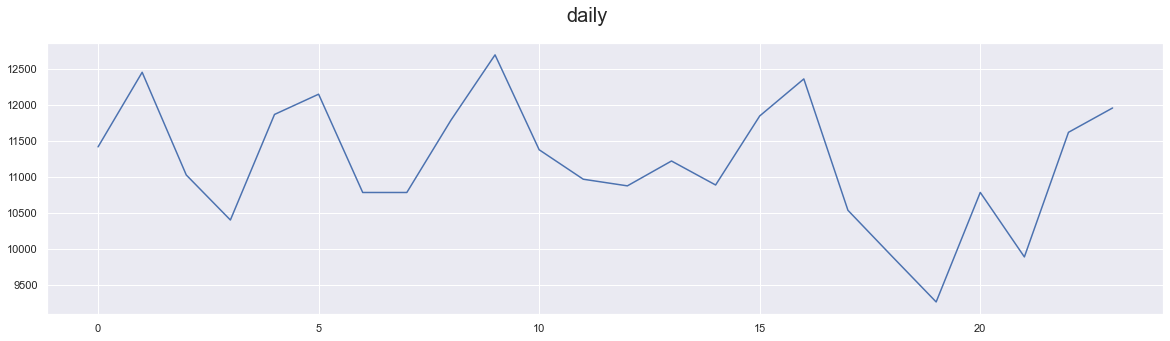

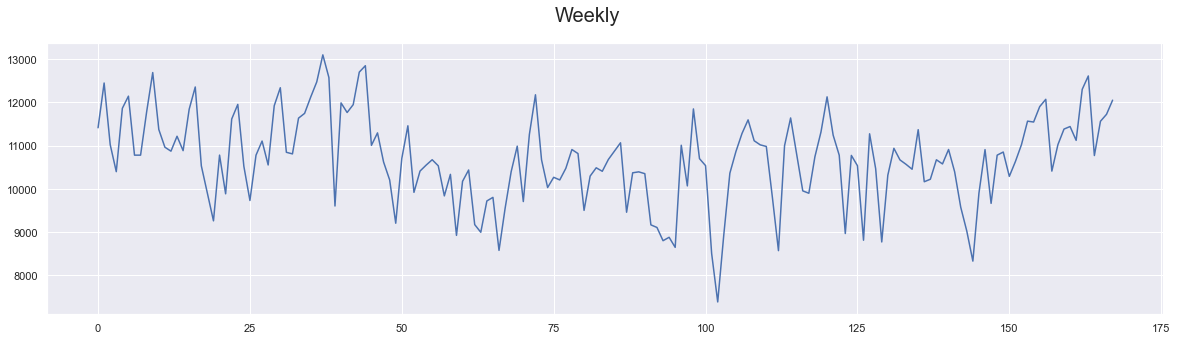

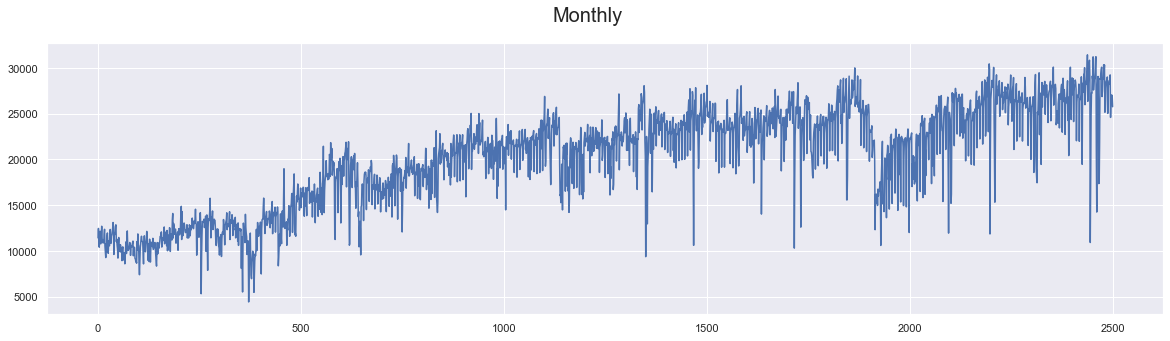

In [242]:
#plot the data loaded to visualize trends
#daily
plt.figure(figsize=(20,5)).suptitle("daily",fontsize=20)
plt.plot(tollroad["Totalflow"].head(24))
plt.show()
#weakly
plt.figure(figsize=(20,5)).suptitle("Weekly",fontsize=20)
plt.plot(tollroad["Totalflow"].head(168))
plt.show()
#monthly
plt.figure(figsize=(20,5)).suptitle("Monthly",fontsize=20)
plt.plot(tollroad["Totalflow"].head(2500))
plt.show()

In [243]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scale the data
print("Request Range before Scaling:",
     min(tollroad.Totalflow),
     max(tollroad.Totalflow))
Scaler = StandardScaler()
Scaled_flows=Scaler.fit_transform(tollroad)
print("Request Range after scaling : " ,
    min(Scaled_flows),
    max(Scaled_flows))
#Training data has to be sequential
#train_size = 2550
train_size=int(len(Scaled_flows) * 0.95)
#number of samples to lookback for each sample
lookback=1500
#separate training and test data
train_flows = Scaled_flows[0:train_size,:]
#Add an additional week for lookback.
test_requests = Scaled_flows[train_size-lookback:,:]

print("\n Shaped of Train,Test : ",
     train_flows.shape, test_requests.shape)


Request Range before Scaling: 4409 31441
Request Range after scaling :  [-2.916826] [2.0178466]

 Shaped of Train,Test :  (2429, 1) (1628, 1)


In [244]:
def create_rnn_dataset(data, lookback=1):
    
    data_x, data_y = [], []
    for i in range(len(data)- lookback -1):
        a = data[i:(i+ lookback),0]
        data_x.append(a)
        data_y.append(data[i + lookback, 0])
    return np.array(data_x), np.array(data_y)

#create x and y for training
train_flow_x,train_req_y = create_rnn_dataset(train_flows,lookback)
#reashape for use with LSTM
train_flow_x = np.reshape(train_flow_x,
                        (train_flow_x.shape[0],1, train_flow_x.shape[1]))
print("Shapes of x,y:",train_flow_x.shape, train_req_y.shape)

Shapes of x,y: (928, 1, 1500) (928,)


In [245]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses  import MeanSquaredError
from tensorflow.keras.metrics  import RootMeanSquaredError
import tensorflow as tf
tf.random.set_seed(3)
ts_model=Sequential()
# Add LSTM
ts_model.add(LSTM(256, input_shape=(1,lookback)))
ts_model.add(Dense(1))
ts_model.compile(loss=MeanSquaredError(),
                optimizer='Adam',
                metrics=[RootMeanSquaredError()])
ts_model.summary()
ts_model.fit(train_flow_x, train_req_y, 
             epochs=1000, batch_size=100, verbose=1)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 256)               1799168   
                                                                 
 dense_23 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,799,425
Trainable params: 1,799,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
10/10 [==============================] - 5s 19ms/step - loss: 0.9133 - root_mean_squared_error: 0.9557
Epoch 2/1000
10/10 [==============================] - 0s 19ms/step - loss: 0.3195 - root_mean_squared_error: 0.5652
Epoch 3/1000
10/10 [==============================] - 0s 20ms/step - loss: 0.2469 - root_mean_squared_error: 0.4969
Epoch 4/1000
10/10 [==============================] - 0s 19ms/step - loss: 0.2190 - root_me

10/10 [==============================] - 0s 18ms/step - loss: 9.9665e-04 - root_mean_squared_error: 0.0316
Epoch 66/1000
10/10 [==============================] - 0s 19ms/step - loss: 9.2841e-04 - root_mean_squared_error: 0.0305
Epoch 67/1000
10/10 [==============================] - 0s 18ms/step - loss: 8.8685e-04 - root_mean_squared_error: 0.0298
Epoch 68/1000
10/10 [==============================] - 0s 19ms/step - loss: 8.8349e-04 - root_mean_squared_error: 0.0297
Epoch 69/1000
10/10 [==============================] - 0s 20ms/step - loss: 7.7180e-04 - root_mean_squared_error: 0.0278
Epoch 70/1000
10/10 [==============================] - 0s 33ms/step - loss: 7.3502e-04 - root_mean_squared_error: 0.0271
Epoch 71/1000
10/10 [==============================] - 0s 25ms/step - loss: 6.4033e-04 - root_mean_squared_error: 0.0253
Epoch 72/1000
10/10 [==============================] - 0s 25ms/step - loss: 5.7398e-04 - root_mean_squared_error: 0.0240
Epoch 73/1000
10/10 [=========================

10/10 [==============================] - 0s 22ms/step - loss: 2.8380e-04 - root_mean_squared_error: 0.0168
Epoch 134/1000
10/10 [==============================] - 0s 22ms/step - loss: 2.6583e-04 - root_mean_squared_error: 0.0163
Epoch 135/1000
10/10 [==============================] - 0s 26ms/step - loss: 2.1747e-04 - root_mean_squared_error: 0.0147
Epoch 136/1000
10/10 [==============================] - 0s 25ms/step - loss: 1.4015e-04 - root_mean_squared_error: 0.0118
Epoch 137/1000
10/10 [==============================] - 0s 23ms/step - loss: 1.0402e-04 - root_mean_squared_error: 0.0102
Epoch 138/1000
10/10 [==============================] - 0s 23ms/step - loss: 9.4336e-05 - root_mean_squared_error: 0.0097
Epoch 139/1000
10/10 [==============================] - 0s 26ms/step - loss: 7.7851e-05 - root_mean_squared_error: 0.0088
Epoch 140/1000
10/10 [==============================] - 0s 26ms/step - loss: 8.4029e-05 - root_mean_squared_error: 0.0092
Epoch 141/1000
10/10 [=================

10/10 [==============================] - 0s 20ms/step - loss: 5.0890e-04 - root_mean_squared_error: 0.0226
Epoch 201/1000
10/10 [==============================] - 0s 20ms/step - loss: 6.8279e-04 - root_mean_squared_error: 0.0261
Epoch 202/1000
10/10 [==============================] - 0s 20ms/step - loss: 8.7396e-04 - root_mean_squared_error: 0.0296
Epoch 203/1000
10/10 [==============================] - 0s 22ms/step - loss: 9.6703e-04 - root_mean_squared_error: 0.0311
Epoch 204/1000
10/10 [==============================] - 0s 22ms/step - loss: 7.4936e-04 - root_mean_squared_error: 0.0274
Epoch 205/1000
10/10 [==============================] - 0s 20ms/step - loss: 6.6587e-04 - root_mean_squared_error: 0.0258
Epoch 206/1000
10/10 [==============================] - 0s 20ms/step - loss: 7.6546e-04 - root_mean_squared_error: 0.0277
Epoch 207/1000
10/10 [==============================] - 0s 21ms/step - loss: 0.0011 - root_mean_squared_error: 0.0330
Epoch 208/1000
10/10 [=====================

10/10 [==============================] - 0s 22ms/step - loss: 1.2084e-06 - root_mean_squared_error: 0.0011
Epoch 269/1000
10/10 [==============================] - 0s 21ms/step - loss: 1.0021e-06 - root_mean_squared_error: 0.0010
Epoch 270/1000
10/10 [==============================] - 0s 22ms/step - loss: 7.7664e-07 - root_mean_squared_error: 8.8127e-04
Epoch 271/1000
10/10 [==============================] - 0s 21ms/step - loss: 7.5606e-07 - root_mean_squared_error: 8.6952e-04
Epoch 272/1000
10/10 [==============================] - 0s 22ms/step - loss: 6.5834e-07 - root_mean_squared_error: 8.1138e-04
Epoch 273/1000
10/10 [==============================] - 0s 24ms/step - loss: 5.4718e-07 - root_mean_squared_error: 7.3972e-04
Epoch 274/1000
10/10 [==============================] - 0s 23ms/step - loss: 5.3974e-07 - root_mean_squared_error: 7.3467e-04
Epoch 275/1000
10/10 [==============================] - 0s 22ms/step - loss: 4.9836e-07 - root_mean_squared_error: 7.0595e-04
Epoch 276/1000


10/10 [==============================] - 0s 26ms/step - loss: 4.2683e-07 - root_mean_squared_error: 6.5332e-04
Epoch 334/1000
10/10 [==============================] - 0s 27ms/step - loss: 4.8694e-07 - root_mean_squared_error: 6.9781e-04
Epoch 335/1000
10/10 [==============================] - 0s 27ms/step - loss: 4.9150e-07 - root_mean_squared_error: 7.0107e-04
Epoch 336/1000
10/10 [==============================] - 0s 28ms/step - loss: 5.6771e-07 - root_mean_squared_error: 7.5346e-04
Epoch 337/1000
10/10 [==============================] - 0s 29ms/step - loss: 8.2989e-07 - root_mean_squared_error: 9.1098e-04
Epoch 338/1000
10/10 [==============================] - 0s 34ms/step - loss: 1.2382e-06 - root_mean_squared_error: 0.0011
Epoch 339/1000
10/10 [==============================] - 0s 33ms/step - loss: 1.5906e-06 - root_mean_squared_error: 0.0013
Epoch 340/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.2149e-06 - root_mean_squared_error: 0.0015
Epoch 341/1000
10/1

10/10 [==============================] - 0s 27ms/step - loss: 2.4499e-06 - root_mean_squared_error: 0.0016
Epoch 401/1000
10/10 [==============================] - 0s 24ms/step - loss: 2.3767e-06 - root_mean_squared_error: 0.0015
Epoch 402/1000
10/10 [==============================] - 0s 24ms/step - loss: 2.1030e-06 - root_mean_squared_error: 0.0015
Epoch 403/1000
10/10 [==============================] - 0s 36ms/step - loss: 1.8822e-06 - root_mean_squared_error: 0.0014
Epoch 404/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.4568e-06 - root_mean_squared_error: 0.0016
Epoch 405/1000
10/10 [==============================] - 0s 26ms/step - loss: 2.1768e-06 - root_mean_squared_error: 0.0015
Epoch 406/1000
10/10 [==============================] - 0s 25ms/step - loss: 3.3355e-06 - root_mean_squared_error: 0.0018
Epoch 407/1000
10/10 [==============================] - 0s 30ms/step - loss: 4.3242e-06 - root_mean_squared_error: 0.0021
Epoch 408/1000
10/10 [=================

10/10 [==============================] - 0s 28ms/step - loss: 7.7185e-05 - root_mean_squared_error: 0.0088
Epoch 468/1000
10/10 [==============================] - 0s 34ms/step - loss: 6.7938e-05 - root_mean_squared_error: 0.0082
Epoch 469/1000
10/10 [==============================] - 0s 32ms/step - loss: 6.9589e-05 - root_mean_squared_error: 0.0083
Epoch 470/1000
10/10 [==============================] - 0s 34ms/step - loss: 7.9101e-05 - root_mean_squared_error: 0.0089
Epoch 471/1000
10/10 [==============================] - 0s 37ms/step - loss: 9.2257e-05 - root_mean_squared_error: 0.0096
Epoch 472/1000
10/10 [==============================] - 0s 42ms/step - loss: 1.0717e-04 - root_mean_squared_error: 0.0104
Epoch 473/1000
10/10 [==============================] - 0s 37ms/step - loss: 1.0431e-04 - root_mean_squared_error: 0.0102
Epoch 474/1000
10/10 [==============================] - 0s 31ms/step - loss: 1.4255e-04 - root_mean_squared_error: 0.0119
Epoch 475/1000
10/10 [=================

10/10 [==============================] - 0s 27ms/step - loss: 1.8160e-06 - root_mean_squared_error: 0.0013
Epoch 535/1000
10/10 [==============================] - 0s 23ms/step - loss: 1.7643e-06 - root_mean_squared_error: 0.0013
Epoch 536/1000
10/10 [==============================] - 0s 27ms/step - loss: 1.6095e-06 - root_mean_squared_error: 0.0013
Epoch 537/1000
10/10 [==============================] - 0s 29ms/step - loss: 1.6651e-06 - root_mean_squared_error: 0.0013
Epoch 538/1000
10/10 [==============================] - 0s 28ms/step - loss: 1.9295e-06 - root_mean_squared_error: 0.0014
Epoch 539/1000
10/10 [==============================] - 0s 25ms/step - loss: 2.4434e-06 - root_mean_squared_error: 0.0016
Epoch 540/1000
10/10 [==============================] - 0s 28ms/step - loss: 2.3219e-06 - root_mean_squared_error: 0.0015
Epoch 541/1000
10/10 [==============================] - 0s 28ms/step - loss: 3.5452e-06 - root_mean_squared_error: 0.0019
Epoch 542/1000
10/10 [=================

10/10 [==============================] - 0s 28ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421
Epoch 602/1000
10/10 [==============================] - 0s 26ms/step - loss: 0.0020 - root_mean_squared_error: 0.0451
Epoch 603/1000
10/10 [==============================] - 0s 24ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416
Epoch 604/1000
10/10 [==============================] - 0s 23ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348
Epoch 605/1000
10/10 [==============================] - 0s 22ms/step - loss: 9.9921e-04 - root_mean_squared_error: 0.0316
Epoch 606/1000
10/10 [==============================] - 0s 24ms/step - loss: 8.0057e-04 - root_mean_squared_error: 0.0283
Epoch 607/1000
10/10 [==============================] - 0s 22ms/step - loss: 5.5031e-04 - root_mean_squared_error: 0.0235
Epoch 608/1000
10/10 [==============================] - 0s 24ms/step - loss: 4.0668e-04 - root_mean_squared_error: 0.0202
Epoch 609/1000
10/10 [==============================] -

10/10 [==============================] - 0s 33ms/step - loss: 3.0636e-06 - root_mean_squared_error: 0.0018
Epoch 669/1000
10/10 [==============================] - 0s 28ms/step - loss: 2.9143e-06 - root_mean_squared_error: 0.0017
Epoch 670/1000
10/10 [==============================] - 0s 27ms/step - loss: 2.7559e-06 - root_mean_squared_error: 0.0017
Epoch 671/1000
10/10 [==============================] - 0s 27ms/step - loss: 3.6703e-06 - root_mean_squared_error: 0.0019
Epoch 672/1000
10/10 [==============================] - 0s 31ms/step - loss: 3.4204e-06 - root_mean_squared_error: 0.0018
Epoch 673/1000
10/10 [==============================] - 0s 27ms/step - loss: 2.9990e-06 - root_mean_squared_error: 0.0017
Epoch 674/1000
10/10 [==============================] - 0s 27ms/step - loss: 2.6784e-06 - root_mean_squared_error: 0.0016
Epoch 675/1000
10/10 [==============================] - 0s 30ms/step - loss: 2.2386e-06 - root_mean_squared_error: 0.0015
Epoch 676/1000
10/10 [=================

10/10 [==============================] - 0s 30ms/step - loss: 2.6126e-04 - root_mean_squared_error: 0.0162
Epoch 736/1000
10/10 [==============================] - 0s 25ms/step - loss: 1.6289e-04 - root_mean_squared_error: 0.0128
Epoch 737/1000
10/10 [==============================] - 0s 27ms/step - loss: 1.1347e-04 - root_mean_squared_error: 0.0107
Epoch 738/1000
10/10 [==============================] - 0s 28ms/step - loss: 7.1525e-05 - root_mean_squared_error: 0.0085
Epoch 739/1000
10/10 [==============================] - 0s 29ms/step - loss: 5.5774e-05 - root_mean_squared_error: 0.0075
Epoch 740/1000
10/10 [==============================] - 0s 24ms/step - loss: 4.2026e-05 - root_mean_squared_error: 0.0065
Epoch 741/1000
10/10 [==============================] - 0s 27ms/step - loss: 2.9356e-05 - root_mean_squared_error: 0.0054
Epoch 742/1000
10/10 [==============================] - 0s 28ms/step - loss: 2.1831e-05 - root_mean_squared_error: 0.0047
Epoch 743/1000
10/10 [=================

10/10 [==============================] - 0s 25ms/step - loss: 2.3999e-08 - root_mean_squared_error: 1.5492e-04
Epoch 801/1000
10/10 [==============================] - 0s 25ms/step - loss: 2.0785e-08 - root_mean_squared_error: 1.4417e-04
Epoch 802/1000
10/10 [==============================] - 0s 25ms/step - loss: 2.2780e-08 - root_mean_squared_error: 1.5093e-04
Epoch 803/1000
10/10 [==============================] - 0s 23ms/step - loss: 1.9209e-08 - root_mean_squared_error: 1.3860e-04
Epoch 804/1000
10/10 [==============================] - 0s 23ms/step - loss: 1.9714e-08 - root_mean_squared_error: 1.4041e-04
Epoch 805/1000
10/10 [==============================] - 0s 24ms/step - loss: 1.8892e-08 - root_mean_squared_error: 1.3745e-04
Epoch 806/1000
10/10 [==============================] - 0s 26ms/step - loss: 1.6900e-08 - root_mean_squared_error: 1.3000e-04
Epoch 807/1000
10/10 [==============================] - 0s 26ms/step - loss: 1.6519e-08 - root_mean_squared_error: 1.2853e-04
Epoch 8

10/10 [==============================] - 0s 26ms/step - loss: 1.8058e-05 - root_mean_squared_error: 0.0042
Epoch 866/1000
10/10 [==============================] - 0s 24ms/step - loss: 2.5018e-05 - root_mean_squared_error: 0.0050
Epoch 867/1000
10/10 [==============================] - 0s 25ms/step - loss: 3.9355e-05 - root_mean_squared_error: 0.0063
Epoch 868/1000
10/10 [==============================] - 0s 25ms/step - loss: 4.8966e-05 - root_mean_squared_error: 0.0070
Epoch 869/1000
10/10 [==============================] - 0s 24ms/step - loss: 5.4919e-05 - root_mean_squared_error: 0.0074
Epoch 870/1000
10/10 [==============================] - 0s 24ms/step - loss: 5.9815e-05 - root_mean_squared_error: 0.0077
Epoch 871/1000
10/10 [==============================] - 0s 25ms/step - loss: 7.3683e-05 - root_mean_squared_error: 0.0086
Epoch 872/1000
10/10 [==============================] - 0s 26ms/step - loss: 1.1454e-04 - root_mean_squared_error: 0.0107
Epoch 873/1000
10/10 [=================

10/10 [==============================] - 0s 23ms/step - loss: 1.4052e-05 - root_mean_squared_error: 0.0037
Epoch 933/1000
10/10 [==============================] - 0s 26ms/step - loss: 1.1973e-05 - root_mean_squared_error: 0.0035
Epoch 934/1000
10/10 [==============================] - 0s 24ms/step - loss: 1.1129e-05 - root_mean_squared_error: 0.0033
Epoch 935/1000
10/10 [==============================] - 0s 24ms/step - loss: 1.3351e-05 - root_mean_squared_error: 0.0037
Epoch 936/1000
10/10 [==============================] - 0s 26ms/step - loss: 1.0442e-05 - root_mean_squared_error: 0.0032
Epoch 937/1000
10/10 [==============================] - 0s 31ms/step - loss: 9.0895e-06 - root_mean_squared_error: 0.0030
Epoch 938/1000
10/10 [==============================] - 0s 28ms/step - loss: 9.7042e-06 - root_mean_squared_error: 0.0031
Epoch 939/1000
10/10 [==============================] - 0s 28ms/step - loss: 8.0275e-06 - root_mean_squared_error: 0.0028
Epoch 940/1000
10/10 [=================

10/10 [==============================] - 0s 28ms/step - loss: 2.8153e-04 - root_mean_squared_error: 0.0168
Epoch 1000/1000
10/10 [==============================] - 0s 36ms/step - loss: 2.1691e-04 - root_mean_squared_error: 0.0147


In [246]:
#preprocess
test_flow_x, test_req_y = create_rnn_dataset(test_requests,lookback)
test_flow_x = np.reshape(test_flow_x,
                       (test_flow_x.shape[0],1, test_flow_x.shape[1]))
ts_model.summary()
ts_model.fit(test_flow_x, test_req_y,
          epochs=1000, batch_size=100, verbose=1)

#ts_model.evaluate(test_flow_x, test_req_y,verbose=1)

#predict for the training dataset
predict_on_train=ts_model.predict(train_flow_x)
#predict on the test dataset
predict_on_test=ts_model.predict(test_flow_x)

predict_on_train = Scaler.inverse_transform(predict_on_train)
predict_on_test = Scaler.inverse_transform(predict_on_test)
train_req_y = Scaler.inverse_transform([train_req_y])
test_req_y = Scaler.inverse_transform([test_req_y])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 256)               1799168   
                                                                 
 dense_23 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,799,425
Trainable params: 1,799,425
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2814 - root_mean_squared_error: 0.5305
Epoch 2/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.3319 - root_mean_squared_error: 0.5761
Epoch 3/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.2186 - root_mean_squared_error: 0.4675
Epoch 4/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.2505 - root_mean_squar

2/2 [==============================] - 0s 24ms/step - loss: 2.3532e-05 - root_mean_squared_error: 0.0049
Epoch 66/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.7384e-05 - root_mean_squared_error: 0.0042
Epoch 67/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.9876e-05 - root_mean_squared_error: 0.0045
Epoch 68/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.6899e-05 - root_mean_squared_error: 0.0041
Epoch 69/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.4479e-05 - root_mean_squared_error: 0.0038
Epoch 70/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.3727e-05 - root_mean_squared_error: 0.0037
Epoch 71/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.3295e-05 - root_mean_squared_error: 0.0036
Epoch 72/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.1483e-05 - root_mean_squared_error: 0.0034
Epoch 73/1000
2/2 [==============================] - 0s 21ms/s

2/2 [==============================] - 0s 23ms/step - loss: 4.4312e-07 - root_mean_squared_error: 6.6567e-04
Epoch 134/1000
2/2 [==============================] - 0s 24ms/step - loss: 4.2478e-07 - root_mean_squared_error: 6.5175e-04
Epoch 135/1000
2/2 [==============================] - 0s 23ms/step - loss: 4.0260e-07 - root_mean_squared_error: 6.3451e-04
Epoch 136/1000
2/2 [==============================] - 0s 25ms/step - loss: 3.7810e-07 - root_mean_squared_error: 6.1490e-04
Epoch 137/1000
2/2 [==============================] - 0s 25ms/step - loss: 3.5999e-07 - root_mean_squared_error: 5.9999e-04
Epoch 138/1000
2/2 [==============================] - 0s 23ms/step - loss: 3.4358e-07 - root_mean_squared_error: 5.8616e-04
Epoch 139/1000
2/2 [==============================] - 0s 25ms/step - loss: 3.2920e-07 - root_mean_squared_error: 5.7376e-04
Epoch 140/1000
2/2 [==============================] - 0s 24ms/step - loss: 3.1739e-07 - root_mean_squared_error: 5.6337e-04
Epoch 141/1000
2/2 [===

2/2 [==============================] - 0s 23ms/step - loss: 2.4252e-08 - root_mean_squared_error: 1.5573e-04
Epoch 200/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.3275e-08 - root_mean_squared_error: 1.5256e-04
Epoch 201/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.1815e-08 - root_mean_squared_error: 1.4770e-04
Epoch 202/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.1452e-08 - root_mean_squared_error: 1.4647e-04
Epoch 203/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.9951e-08 - root_mean_squared_error: 1.4125e-04
Epoch 204/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.8631e-08 - root_mean_squared_error: 1.3650e-04
Epoch 205/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.7874e-08 - root_mean_squared_error: 1.3369e-04
Epoch 206/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.6843e-08 - root_mean_squared_error: 1.2978e-04
Epoch 207/1000
2/2 [===

2/2 [==============================] - 0s 24ms/step - loss: 8.3677e-10 - root_mean_squared_error: 2.8927e-05
Epoch 266/1000
2/2 [==============================] - 0s 24ms/step - loss: 7.8468e-10 - root_mean_squared_error: 2.8012e-05
Epoch 267/1000
2/2 [==============================] - 0s 24ms/step - loss: 7.3757e-10 - root_mean_squared_error: 2.7158e-05
Epoch 268/1000
2/2 [==============================] - 0s 34ms/step - loss: 7.3557e-10 - root_mean_squared_error: 2.7121e-05
Epoch 269/1000
2/2 [==============================] - 0s 29ms/step - loss: 7.0253e-10 - root_mean_squared_error: 2.6505e-05
Epoch 270/1000
2/2 [==============================] - 0s 29ms/step - loss: 6.3069e-10 - root_mean_squared_error: 2.5114e-05
Epoch 271/1000
2/2 [==============================] - 0s 28ms/step - loss: 6.3071e-10 - root_mean_squared_error: 2.5114e-05
Epoch 272/1000
2/2 [==============================] - 0s 28ms/step - loss: 5.6852e-10 - root_mean_squared_error: 2.3844e-05
Epoch 273/1000
2/2 [===

2/2 [==============================] - 0s 27ms/step - loss: 2.3312e-11 - root_mean_squared_error: 4.8282e-06
Epoch 332/1000
2/2 [==============================] - 0s 28ms/step - loss: 2.0540e-11 - root_mean_squared_error: 4.5322e-06
Epoch 333/1000
2/2 [==============================] - 0s 30ms/step - loss: 1.9655e-11 - root_mean_squared_error: 4.4334e-06
Epoch 334/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.8294e-11 - root_mean_squared_error: 4.2771e-06
Epoch 335/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.6627e-11 - root_mean_squared_error: 4.0777e-06
Epoch 336/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.5880e-11 - root_mean_squared_error: 3.9850e-06
Epoch 337/1000
2/2 [==============================] - 0s 28ms/step - loss: 1.4751e-11 - root_mean_squared_error: 3.8407e-06
Epoch 338/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.3831e-11 - root_mean_squared_error: 3.7190e-06
Epoch 339/1000
2/2 [===

2/2 [==============================] - 0s 27ms/step - loss: 2.9479e-13 - root_mean_squared_error: 5.4294e-07
Epoch 398/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.7791e-13 - root_mean_squared_error: 5.2717e-07
Epoch 399/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.5896e-13 - root_mean_squared_error: 5.0888e-07
Epoch 400/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.3931e-13 - root_mean_squared_error: 4.8919e-07
Epoch 401/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.2475e-13 - root_mean_squared_error: 4.7408e-07
Epoch 402/1000
2/2 [==============================] - 0s 28ms/step - loss: 2.0708e-13 - root_mean_squared_error: 4.5506e-07
Epoch 403/1000
2/2 [==============================] - 0s 31ms/step - loss: 2.0426e-13 - root_mean_squared_error: 4.5195e-07
Epoch 404/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.9136e-13 - root_mean_squared_error: 4.3745e-07
Epoch 405/1000
2/2 [===

2/2 [==============================] - 0s 27ms/step - loss: 2.1359e-14 - root_mean_squared_error: 1.4615e-07
Epoch 464/1000
2/2 [==============================] - 0s 27ms/step - loss: 2.1097e-14 - root_mean_squared_error: 1.4525e-07
Epoch 465/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.9689e-14 - root_mean_squared_error: 1.4032e-07
Epoch 466/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.9980e-14 - root_mean_squared_error: 1.4135e-07
Epoch 467/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.8369e-14 - root_mean_squared_error: 1.3553e-07
Epoch 468/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.7574e-14 - root_mean_squared_error: 1.3257e-07
Epoch 469/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.7413e-14 - root_mean_squared_error: 1.3196e-07
Epoch 470/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.9518e-14 - root_mean_squared_error: 1.3971e-07
Epoch 471/1000
2/2 [===

2/2 [==============================] - 0s 27ms/step - loss: 6.2378e-15 - root_mean_squared_error: 7.8980e-08
Epoch 530/1000
2/2 [==============================] - 0s 23ms/step - loss: 7.1436e-15 - root_mean_squared_error: 8.4520e-08
Epoch 531/1000
2/2 [==============================] - 0s 25ms/step - loss: 6.2462e-15 - root_mean_squared_error: 7.9033e-08
Epoch 532/1000
2/2 [==============================] - 0s 23ms/step - loss: 5.3889e-15 - root_mean_squared_error: 7.3409e-08
Epoch 533/1000
2/2 [==============================] - 0s 22ms/step - loss: 5.6427e-15 - root_mean_squared_error: 7.5118e-08
Epoch 534/1000
2/2 [==============================] - 0s 27ms/step - loss: 5.7262e-15 - root_mean_squared_error: 7.5671e-08
Epoch 535/1000
2/2 [==============================] - 0s 29ms/step - loss: 5.8245e-15 - root_mean_squared_error: 7.6318e-08
Epoch 536/1000
2/2 [==============================] - 0s 25ms/step - loss: 4.7665e-15 - root_mean_squared_error: 6.9040e-08
Epoch 537/1000
2/2 [===

2/2 [==============================] - 0s 26ms/step - loss: 4.5975e-15 - root_mean_squared_error: 6.7805e-08
Epoch 596/1000
2/2 [==============================] - 0s 27ms/step - loss: 3.8950e-15 - root_mean_squared_error: 6.2410e-08
Epoch 597/1000
2/2 [==============================] - 0s 27ms/step - loss: 3.4374e-15 - root_mean_squared_error: 5.8629e-08
Epoch 598/1000
2/2 [==============================] - 0s 24ms/step - loss: 3.7192e-15 - root_mean_squared_error: 6.0985e-08
Epoch 599/1000
2/2 [==============================] - 0s 26ms/step - loss: 4.5945e-15 - root_mean_squared_error: 6.7783e-08
Epoch 600/1000
2/2 [==============================] - 0s 26ms/step - loss: 4.4004e-15 - root_mean_squared_error: 6.6335e-08
Epoch 601/1000
2/2 [==============================] - 0s 24ms/step - loss: 3.6470e-15 - root_mean_squared_error: 6.0390e-08
Epoch 602/1000
2/2 [==============================] - 0s 25ms/step - loss: 3.8039e-15 - root_mean_squared_error: 6.1675e-08
Epoch 603/1000
2/2 [===

2/2 [==============================] - 0s 31ms/step - loss: 8.6167e-15 - root_mean_squared_error: 9.2826e-08
Epoch 662/1000
2/2 [==============================] - 0s 27ms/step - loss: 7.1361e-15 - root_mean_squared_error: 8.4475e-08
Epoch 663/1000
2/2 [==============================] - 0s 25ms/step - loss: 9.9380e-15 - root_mean_squared_error: 9.9690e-08
Epoch 664/1000
2/2 [==============================] - 0s 24ms/step - loss: 4.0526e-15 - root_mean_squared_error: 6.3660e-08
Epoch 665/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.0194e-14 - root_mean_squared_error: 1.0097e-07
Epoch 666/1000
2/2 [==============================] - 0s 26ms/step - loss: 6.1683e-15 - root_mean_squared_error: 7.8538e-08
Epoch 667/1000
2/2 [==============================] - 0s 24ms/step - loss: 5.4411e-15 - root_mean_squared_error: 7.3764e-08
Epoch 668/1000
2/2 [==============================] - 0s 26ms/step - loss: 5.9562e-15 - root_mean_squared_error: 7.7176e-08
Epoch 669/1000
2/2 [===

2/2 [==============================] - 0s 26ms/step - loss: 3.1801e-15 - root_mean_squared_error: 5.6393e-08
Epoch 728/1000
2/2 [==============================] - 0s 25ms/step - loss: 3.1426e-15 - root_mean_squared_error: 5.6059e-08
Epoch 729/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.7116e-15 - root_mean_squared_error: 5.2073e-08
Epoch 730/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.9609e-15 - root_mean_squared_error: 5.4414e-08
Epoch 731/1000
2/2 [==============================] - 0s 22ms/step - loss: 4.0519e-15 - root_mean_squared_error: 6.3654e-08
Epoch 732/1000
2/2 [==============================] - 0s 23ms/step - loss: 3.4651e-15 - root_mean_squared_error: 5.8865e-08
Epoch 733/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.3887e-15 - root_mean_squared_error: 4.8875e-08
Epoch 734/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.9840e-15 - root_mean_squared_error: 4.4542e-08
Epoch 735/1000
2/2 [===

2/2 [==============================] - 0s 23ms/step - loss: 4.1192e-15 - root_mean_squared_error: 6.4181e-08
Epoch 794/1000
2/2 [==============================] - 0s 24ms/step - loss: 5.5978e-15 - root_mean_squared_error: 7.4818e-08
Epoch 795/1000
2/2 [==============================] - 0s 24ms/step - loss: 4.8947e-15 - root_mean_squared_error: 6.9962e-08
Epoch 796/1000
2/2 [==============================] - 0s 24ms/step - loss: 6.4761e-15 - root_mean_squared_error: 8.0474e-08
Epoch 797/1000
2/2 [==============================] - 0s 25ms/step - loss: 6.2373e-15 - root_mean_squared_error: 7.8977e-08
Epoch 798/1000
2/2 [==============================] - 0s 29ms/step - loss: 7.5706e-15 - root_mean_squared_error: 8.7009e-08
Epoch 799/1000
2/2 [==============================] - 0s 25ms/step - loss: 5.0170e-15 - root_mean_squared_error: 7.0831e-08
Epoch 800/1000
2/2 [==============================] - 0s 24ms/step - loss: 5.2075e-15 - root_mean_squared_error: 7.2163e-08
Epoch 801/1000
2/2 [===

2/2 [==============================] - 0s 26ms/step - loss: 4.1075e-15 - root_mean_squared_error: 6.4090e-08
Epoch 860/1000
2/2 [==============================] - 0s 25ms/step - loss: 3.2544e-15 - root_mean_squared_error: 5.7047e-08
Epoch 861/1000
2/2 [==============================] - 0s 26ms/step - loss: 2.6670e-15 - root_mean_squared_error: 5.1643e-08
Epoch 862/1000
2/2 [==============================] - 0s 28ms/step - loss: 3.4630e-15 - root_mean_squared_error: 5.8847e-08
Epoch 863/1000
2/2 [==============================] - 0s 24ms/step - loss: 5.0227e-15 - root_mean_squared_error: 7.0871e-08
Epoch 864/1000
2/2 [==============================] - 0s 24ms/step - loss: 4.2472e-15 - root_mean_squared_error: 6.5171e-08
Epoch 865/1000
2/2 [==============================] - 0s 24ms/step - loss: 3.0432e-15 - root_mean_squared_error: 5.5165e-08
Epoch 866/1000
2/2 [==============================] - 0s 22ms/step - loss: 3.4905e-15 - root_mean_squared_error: 5.9081e-08
Epoch 867/1000
2/2 [===

2/2 [==============================] - 0s 25ms/step - loss: 3.5894e-15 - root_mean_squared_error: 5.9911e-08
Epoch 926/1000
2/2 [==============================] - 0s 23ms/step - loss: 4.2239e-15 - root_mean_squared_error: 6.4992e-08
Epoch 927/1000
2/2 [==============================] - 0s 24ms/step - loss: 3.4682e-15 - root_mean_squared_error: 5.8891e-08
Epoch 928/1000
2/2 [==============================] - 0s 30ms/step - loss: 2.5400e-15 - root_mean_squared_error: 5.0398e-08
Epoch 929/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.8082e-15 - root_mean_squared_error: 5.2993e-08
Epoch 930/1000
2/2 [==============================] - 0s 24ms/step - loss: 3.6227e-15 - root_mean_squared_error: 6.0189e-08
Epoch 931/1000
2/2 [==============================] - 0s 28ms/step - loss: 2.8972e-15 - root_mean_squared_error: 5.3826e-08
Epoch 932/1000
2/2 [==============================] - 0s 29ms/step - loss: 3.9672e-15 - root_mean_squared_error: 6.2985e-08
Epoch 933/1000
2/2 [===

2/2 [==============================] - 0s 30ms/step - loss: 5.4158e-15 - root_mean_squared_error: 7.3592e-08
Epoch 992/1000
2/2 [==============================] - 0s 27ms/step - loss: 6.0637e-15 - root_mean_squared_error: 7.7870e-08
Epoch 993/1000
2/2 [==============================] - 0s 25ms/step - loss: 4.3042e-15 - root_mean_squared_error: 6.5607e-08
Epoch 994/1000
2/2 [==============================] - 0s 29ms/step - loss: 3.3718e-15 - root_mean_squared_error: 5.8067e-08
Epoch 995/1000
2/2 [==============================] - 0s 24ms/step - loss: 3.5469e-15 - root_mean_squared_error: 5.9556e-08
Epoch 996/1000
2/2 [==============================] - 0s 25ms/step - loss: 4.7550e-15 - root_mean_squared_error: 6.8957e-08
Epoch 997/1000
2/2 [==============================] - 0s 25ms/step - loss: 5.5644e-15 - root_mean_squared_error: 7.4595e-08
Epoch 998/1000
2/2 [==============================] - 0s 23ms/step - loss: 4.7104e-15 - root_mean_squared_error: 6.8632e-08
Epoch 999/1000
2/2 [===

In [248]:
#calculate root mean aquared error
trainScore = math.sqrt(mean_squared_error(train_req_y[0],predict_on_train[:,0]))
print('Train Score:%.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_req_y[0], predict_on_test[:,0]))
print('Test Score:%.2f RMSE' %(testScore))

Train Score:1383.71 RMSE
Test Score:0.00 RMSE


In [249]:
error =np.sqrt(mean_squared_error(train_req_y[0],predict_on_train[:,0]))
print("error:",error)
mae = mean_absolute_error(train_req_y[0],predict_on_train[:,0])
mse = mean_squared_error(train_req_y[0],predict_on_train[:,0])
lmse = mean_squared_log_error(train_req_y[0],predict_on_train[:,0])
rmse = np.sqrt(mse)
lrmse = np.sqrt(lmse)
print("RMSE:", rmse)
print("MAE:", mae)
#print("MSE:", mse)
#print("LMSE:", lmse)
#print("LRMSE:", lrmse)

error: 1383.7057627374643
RMSE: 1383.7057627374643
MAE: 1051.7418086610992


In [250]:
error =np.sqrt(mean_squared_error(test_req_y[0],predict_on_test[:,0]))
print("error:",error)
mae = mean_absolute_error(test_req_y[0],predict_on_test[:,0])
mse = mean_squared_error(test_req_y[0],predict_on_test[:,0])
lmse = mean_squared_log_error(test_req_y[0],predict_on_test[:,0])
rmse = np.sqrt(mse)
lrmse = np.sqrt(lmse)
print("RMSE:", rmse)
print("MAE:", mae)
#print("MSE:", mse)
#print("LMSE:", lmse)

#print("LRMSE:", lrmse)

error: 0.0007942145259396751
RMSE: 0.0007942145259396751
MAE: 0.00032295767716535435


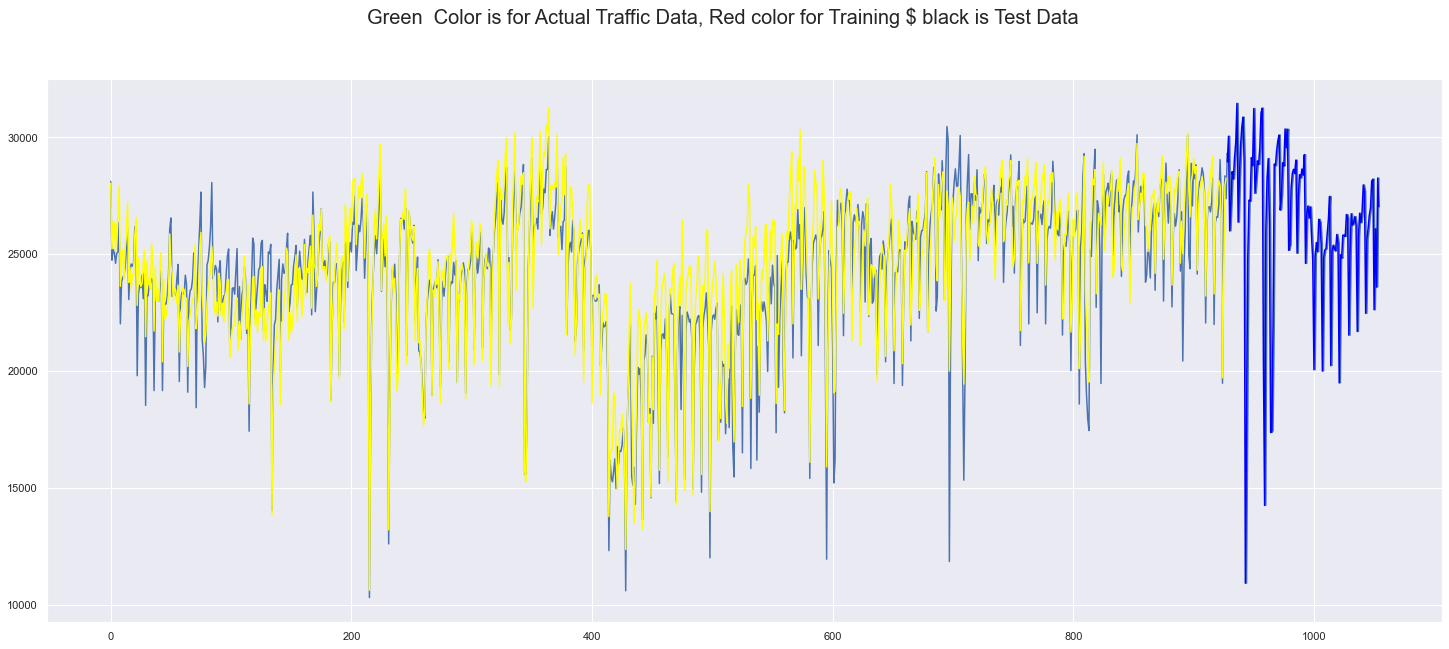

In [279]:
#plot the predictions
#Total_size of plot
total_size = len(predict_on_train) + len(predict_on_test)

#plot original data
orig_data=tollroad.Totalflow.to_numpy()
orig_data=orig_data.reshape(len(orig_data),1)

#create a plot for predictions on training
orig_plot = np.empty((total_size,1))
orig_plot[:, :] = np.nan
orig_plot[0:total_size, :] = orig_data[lookback:-2]

#create a plot for prediction on training
predict_train_plot =np.empty((total_size,1))
predict_train_plot[:, :] = np.nan
predict_train_plot[0:len(predict_on_train), :] = predict_on_train

#create a plot for prediction on testing
predict_test_plot = np.empty((total_size,1))
predict_test_plot[:, :] = np.nan
predict_test_plot[len(predict_on_train):total_size, :] = predict_on_test

#plot the graph
plt.figure(figsize=(25,10)).suptitle("Green  Color is for Actual Traffic Data, Red color for Training $ black is Test Data",fontsize=20)
plt.plot(orig_plot[:2555])
plt.plot(predict_train_plot[:2044],color='yellow')
plt.plot(predict_test_plot[:2045],color='blue')
plt.show()

In [273]:
#predicting future Traffic flow
curr_input = test_flow_x[-1,:].flatten()

#predict for hours
predict_for =365
for i in range(predict_for):
    
    this_input=curr_input[-lookback:]
    this_input=this_input.reshape((1,1,lookback))
    this_prediction=ts_model.predict(this_input)
    
    
    curr_input = np.append(curr_input,this_prediction.flatten())
predict_on_future=np.reshape(np.array(curr_input[-predict_for:]),(predict_for,1))
predict_on_future=Scaler.inverse_transform(predict_on_future)

print(predict_on_future[:365])

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
[[27020.00042731]
 [27440.94307694]
 [27138.3325099 ]
 [25460.49040056]
 [27042.33845999]
 [26139.68981981]
 [26734.49128395]
 [26676.36681783]
 [26968.73011358]
 [27144.35079006]
 [26121.44233692]
 [27597.33673274]
 [27005.40270221]
 [27821.9610725 ]
 [27200.53381228]
 [28010.34447329]
 [27125.19299005]
 [24975.97574868]
 [26104.55575853]
 [25384.69278721]
 [25917.74680148]
 [26456.3913644 ]
 [27141.08239898]
 [26352.92670631]
 [25663.56980674]
 [27216.57211095]
 [26655.04293327]
 [27587.06660558]
 [27222.01964709]
 [27955.99188067]
 [26680.55923955]
 [24699.36929774]
 [26922.94847658]
 [26765.28076864]
 [28209.75681651]
 [28202.47362656]
 [28653.98112022]
 [26926.38926631]
 [26431.29625937]
 [27532.71858413]
 [27684.06957941]
 [27973.52168887]
 [27597.22702451]
 [26738.29972686]
 [26138.16043481]
 [26235.03215059]
 [27317.74595668]
 [27303.59163568]
 [28122.95540219]
 [28030.01751016]
 [28097.31371508]
 [27730.44481631]
 [26876.3453

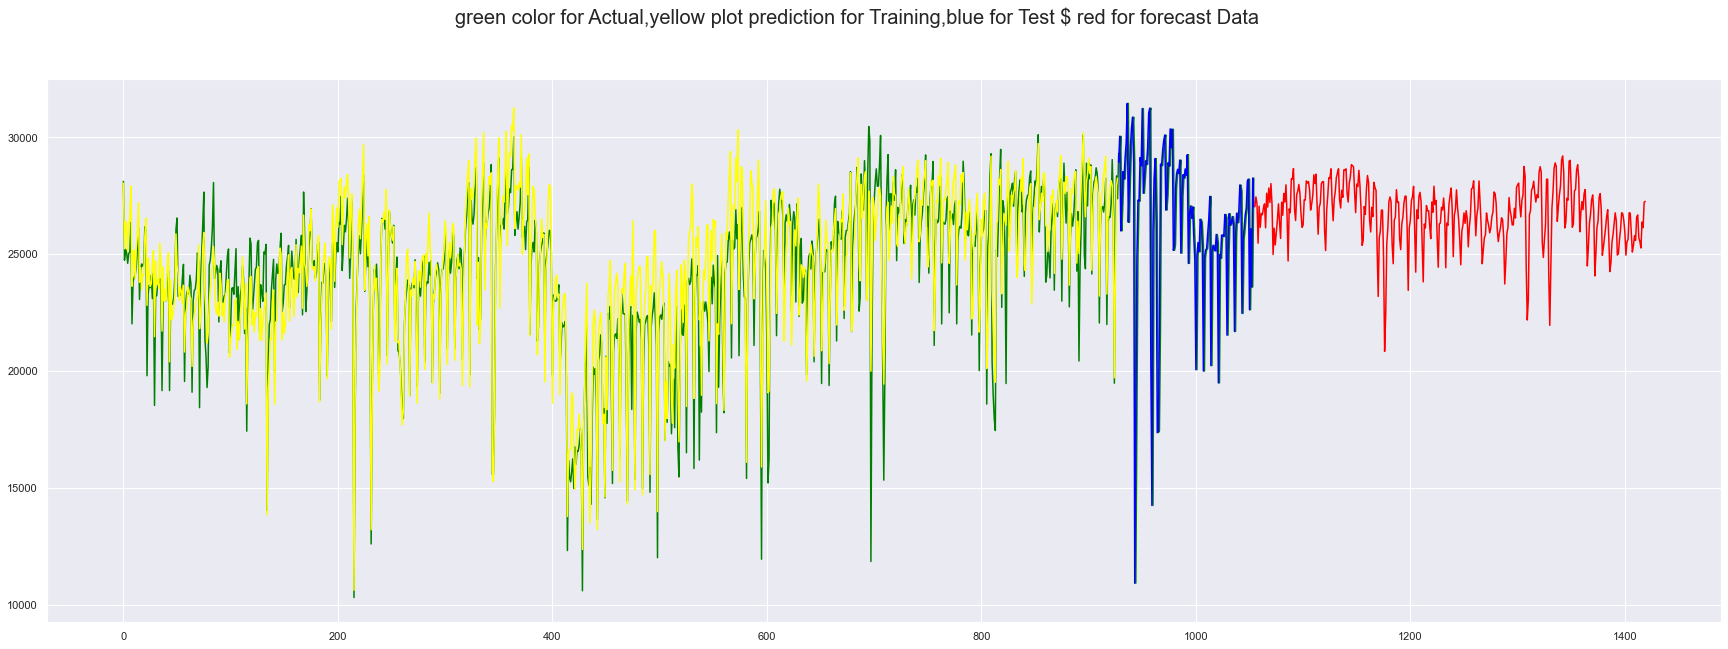

In [275]:
#plot the training data with the forecast data
total_size = len(predict_on_train) + len(predict_on_test) + len(predict_on_future)

#setup training chart
predict_train_plot =np.empty((total_size,1))
predict_train_plot[:, :] = np.nan
predict_train_plot[0:len(predict_on_train), :] = predict_on_train

#setting test chart
predict_test_plot = np.empty((total_size,1))
predict_test_plot[:, :] = np.nan
predict_test_plot[len(predict_on_train):len(predict_on_train)+len(predict_on_test), :] = predict_on_test

#setting future forecast chart
predict_future_plot = np.empty((total_size,1))
predict_future_plot[:, :] = np.nan
predict_future_plot[len(predict_on_train)+len(predict_on_test):total_size:] = predict_on_future

#plot the graph
plt.figure(figsize=(30,10)).suptitle("green color for Actual,yellow plot prediction for Training,blue for Test $ red for forecast Data",fontsize=20)
plt.plot(orig_plot[:2555],color='green')
plt.plot(predict_train_plot[:2044],color='yellow')
plt.plot(predict_test_plot[:2045],color='blue')
plt.plot(predict_future_plot[:2555],color='red')
plt.show()

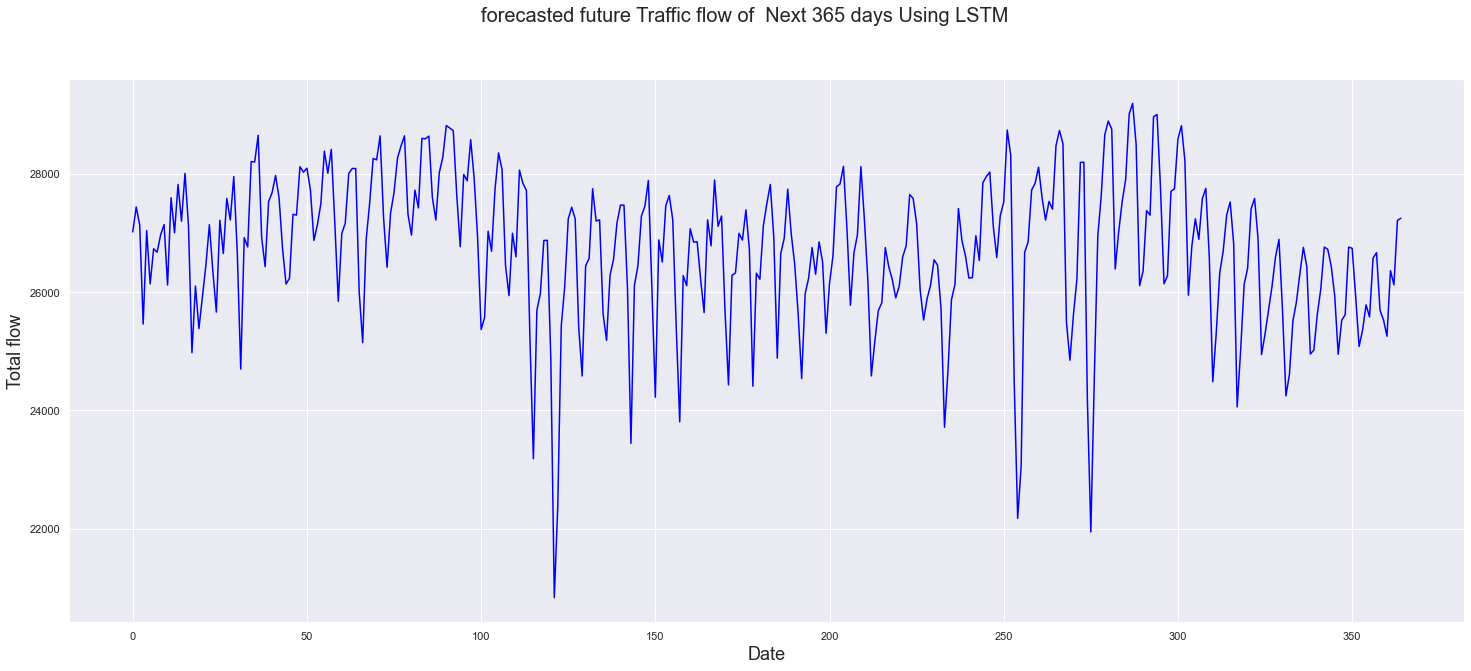

In [270]:
plt.figure(figsize=(25,10)).suptitle("forecasted future Traffic flow of  Next 365 days Using LSTM", fontsize=20)
plt.ylabel('Total flow',fontsize=18)
plt.plot(predict_on_future,color='blue')
plt.xlabel('Date',fontsize=18)
plt.show()

In [271]:
ts_model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 256)               1799168   
                                                                 
 dense_23 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,799,425
Trainable params: 1,799,425
Non-trainable params: 0
_________________________________________________________________


In [256]:
orig_data

array([[11414],
       [12449],
       [11024],
       ...,
       [28249],
       [27020],
       [27707]])

In [134]:
predict_on_train

array([[22681.836],
       [17759.947],
       [19776.496],
       [20604.086],
       [20319.83 ],
       [22799.666],
       [23201.459],
       [23057.57 ],
       [17527.879],
       [17970.467],
       [20782.504],
       [21012.217],
       [20977.066],
       [23293.445],
       [20038.01 ],
       [17764.037],
       [21093.586],
       [22519.99 ],
       [21003.086],
       [23210.8  ],
       [21339.717],
       [20094.39 ],
       [17789.076],
       [17813.523],
       [17791.072],
       [18134.953],
       [17565.273],
       [19113.738],
       [17787.402],
       [17610.969],
       [17806.805],
       [17808.145],
       [20642.576],
       [19631.52 ],
       [18456.955],
       [17811.47 ],
       [17709.979],
       [17825.145],
       [17817.67 ],
       [20703.143],
       [19109.102],
       [20925.389],
       [17806.1  ],
       [17701.404],
       [17816.467],
       [17812.94 ],
       [18063.895],
       [20624.805],
       [20679.662],
       [23047.355],


In [30]:
predict_on_test

array([[22194.535],
       [20074.256],
       [23247.494],
       [24171.916],
       [22919.453],
       [24752.807],
       [23831.602],
       [23742.818],
       [17442.445],
       [24847.184],
       [19311.352],
       [22171.809],
       [23682.066],
       [24676.43 ],
       [19900.303],
       [18283.686],
       [24225.475],
       [24717.586],
       [24683.35 ],
       [25706.84 ],
       [26024.422],
       [25640.434],
       [20699.197],
       [25633.451],
       [25314.74 ],
       [25425.715],
       [27108.611],
       [25831.266],
       [26398.443],
       [20645.365],
       [24374.232],
       [26275.15 ],
       [27047.994],
       [24160.87 ],
       [23175.621],
       [23111.188],
       [15297.57 ],
       [22554.55 ],
       [24396.146],
       [25438.424],
       [25716.205],
       [25823.566],
       [25509.174],
       [20946.574],
       [24804.398],
       [25694.219],
       [25924.322],
       [26232.566],
       [26940.37 ],
       [20235.303],


In [31]:
predict_on_future

array([[27102.91307662],
       [27274.25774414],
       [25668.89522717],
       [25693.08066811],
       [27810.45803378],
       [24925.35715409],
       [25334.50616879],
       [24302.27088338],
       [23643.00995575],
       [26823.87018869],
       [25675.58318465],
       [26850.46659863],
       [25683.08481152],
       [26294.23541432],
       [25297.77023672],
       [26331.99594291],
       [25357.3738049 ],
       [23377.02397999],
       [23877.12601665],
       [22894.84340339],
       [25014.23682108],
       [25204.72720764],
       [25503.31873114],
       [23419.35144025],
       [23763.08463607],
       [25481.39438992],
       [25598.25651282],
       [27210.88687365],
       [26152.60078084],
       [27059.87871659],
       [25789.46000289],
       [24286.95221847],
       [25822.08154975],
       [26177.15191589],
       [27137.92567521],
       [27312.47539037],
       [27651.87870267],
       [26545.00361757],
       [24798.84233935],
       [24996.97932438],


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
import xgboost as xgb
import warnings
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from math import sqrt

%matplotlib inline

In [193]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [194]:
tf.random.set_seed(42)
np.random.seed(42)
tf.keras.backend.set_floatx('float32')
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))
sns.set()

In [195]:
tollroad=pd.read_csv('H:/My research/python jupyter/ARIMA/etretrafficbydate.csv',parse_dates=['Date'])

In [196]:
tollroad.tail()

,Date,Totalflow
2552,2021-12-27,26076
2553,2021-12-28,23582
2554,2021-12-29,28249
2555,2021-12-30,27020
2556,2021-12-31,27707


In [197]:
tollroad.describe().round(2)

,Totalflow
count,2557.00
mean,20387.29
std,5479.04
min,4409.00
25%,16437.00
50%,21668.00
75%,24649.00
max,31441.00


In [198]:
tollroad.dtypes

Date         datetime64[ns]
Totalflow             int64
dtype: object

In [199]:
# Convert time to datetime object and set it as index

tollroad['Date'] = pd.to_datetime(tollroad['Date'], utc=True, infer_datetime_format=True)
tollroad =tollroad.set_index('Date')

In [200]:
# Find the number of NaNs in each column

tollroad.isnull().sum(axis=0)

Totalflow    0
dtype: int64

In [201]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe and which
    constitutes one of its columns or it a custom pandas series created by the user.
    The user can define either the 'df' and the 'column' or the 'series' and additionally,
    can also define the 'label', the 'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

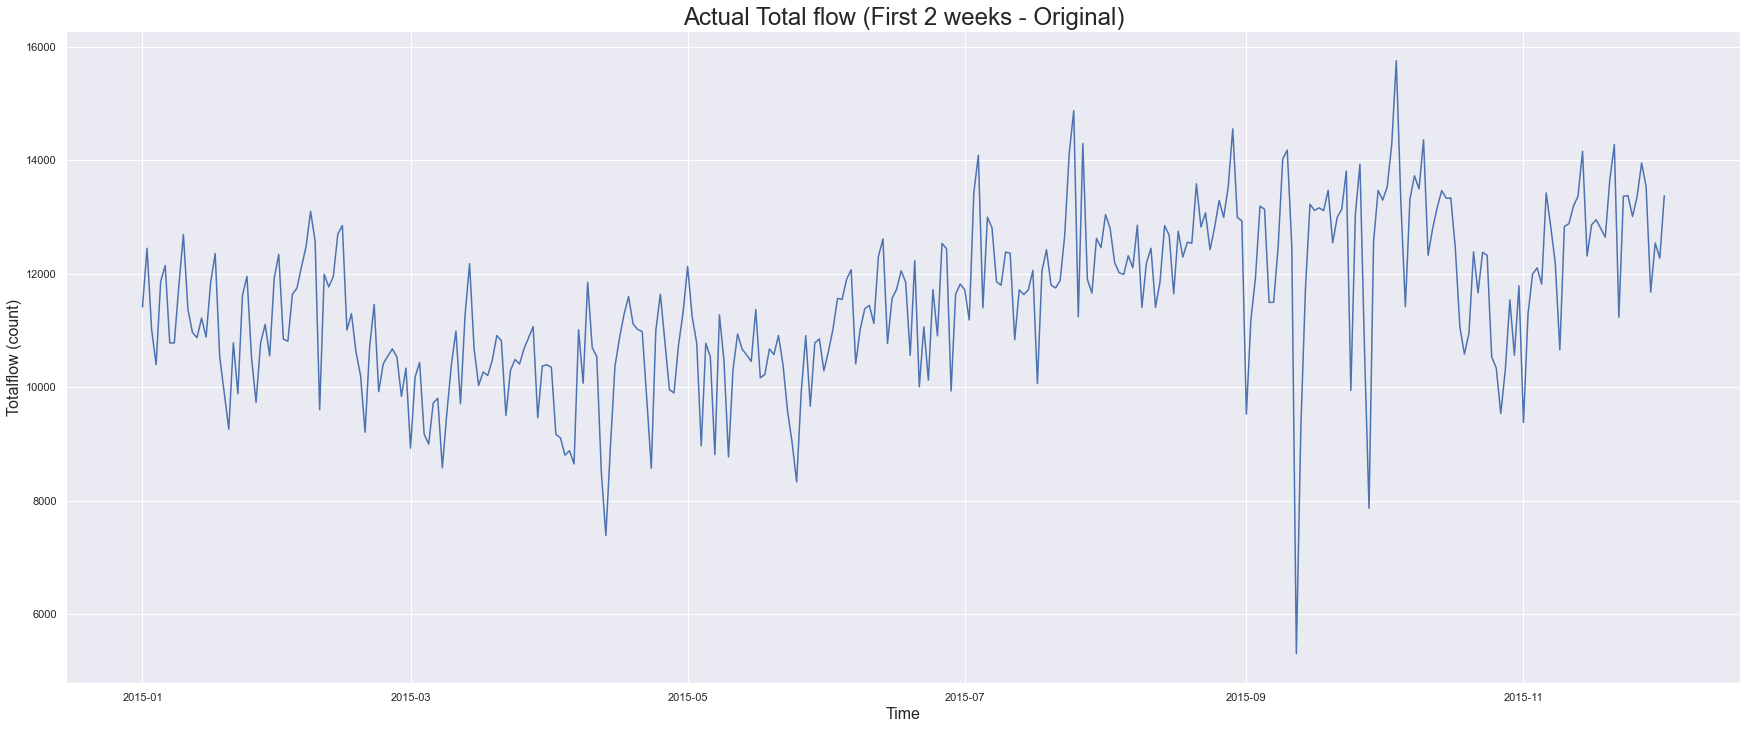

In [202]:
# Zoom into the plot of the hourly (actual) total flow

ax = plot_series(df=tollroad, column='Totalflow', ylabel='Totalflow (count)',
                 title='Actual Total flow (First 2 weeks - Original)', end=24*7*2)
plt.show()

In [203]:
# Display the rows with null values

tollroad[tollroad.isnull().any(axis=1)]

,Totalflow
Date,


In [204]:
# Fill null values using interpolation
tollroad.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

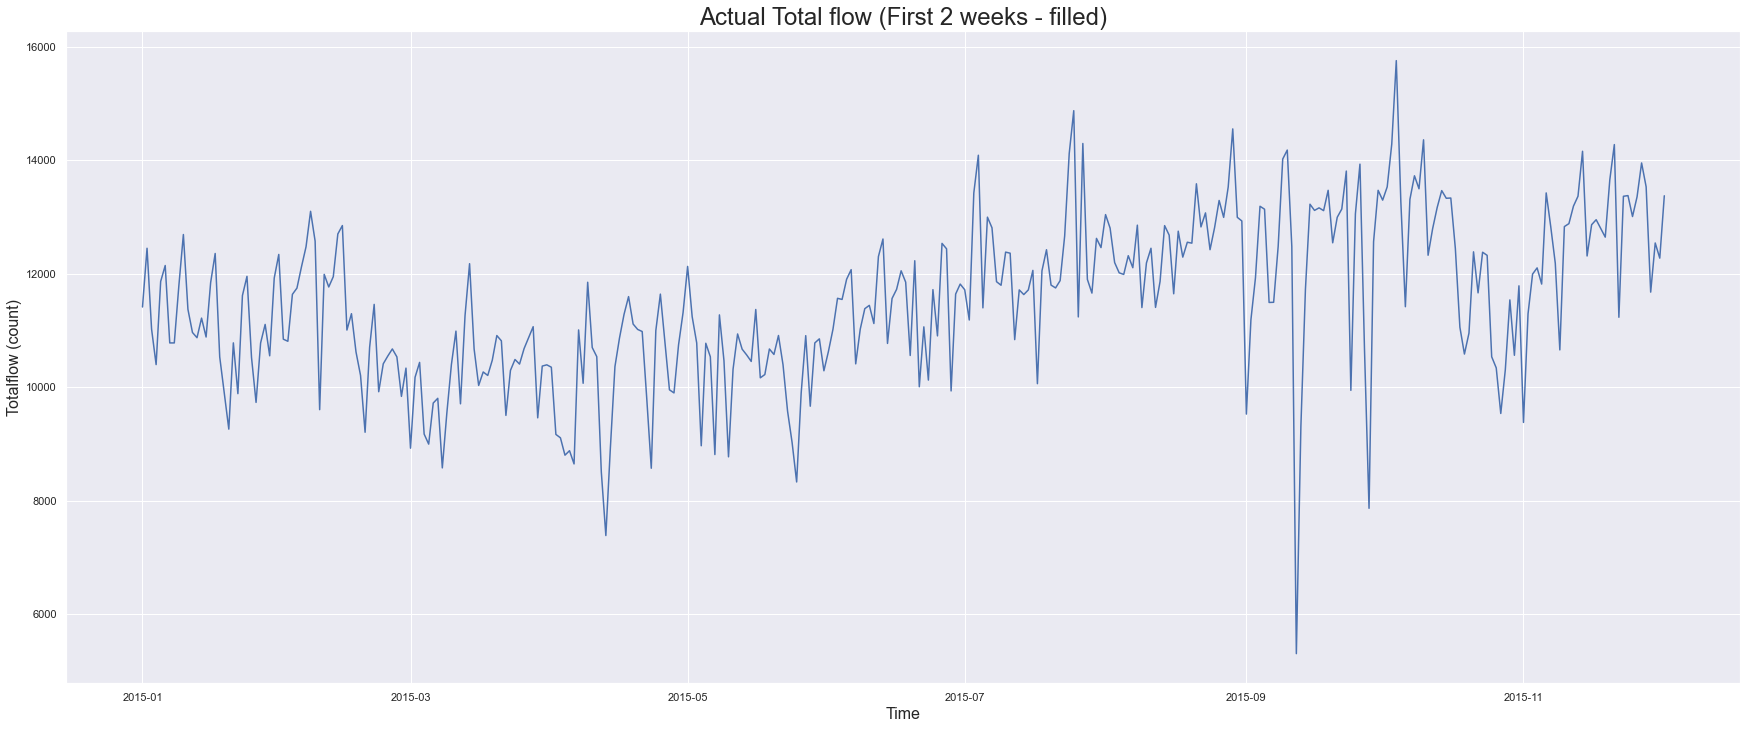

In [205]:
# Zoom into the plot of the hourly (actual) total flow

ax = plot_series(df=tollroad, column='Totalflow', ylabel='Totalflow (count)',
                 title='Actual Total flow (First 2 weeks - filled)', end=24*7*2)
plt.show()

In [206]:
# Display the number of non-zero values in each column

print('Non-zero values in each column:\n', tollroad.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

Totalflow    2557
dtype: int64


<AxesSubplot:xlabel='Totalflow'>

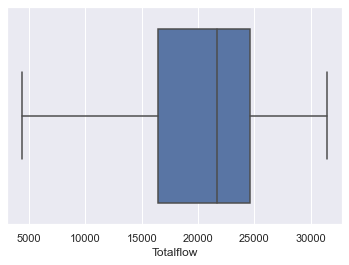

In [207]:
# Check for outliers in 'Totalflow' column again

sns.boxplot(x=tollroad['Totalflow'])

In [208]:
df_final = tollroad

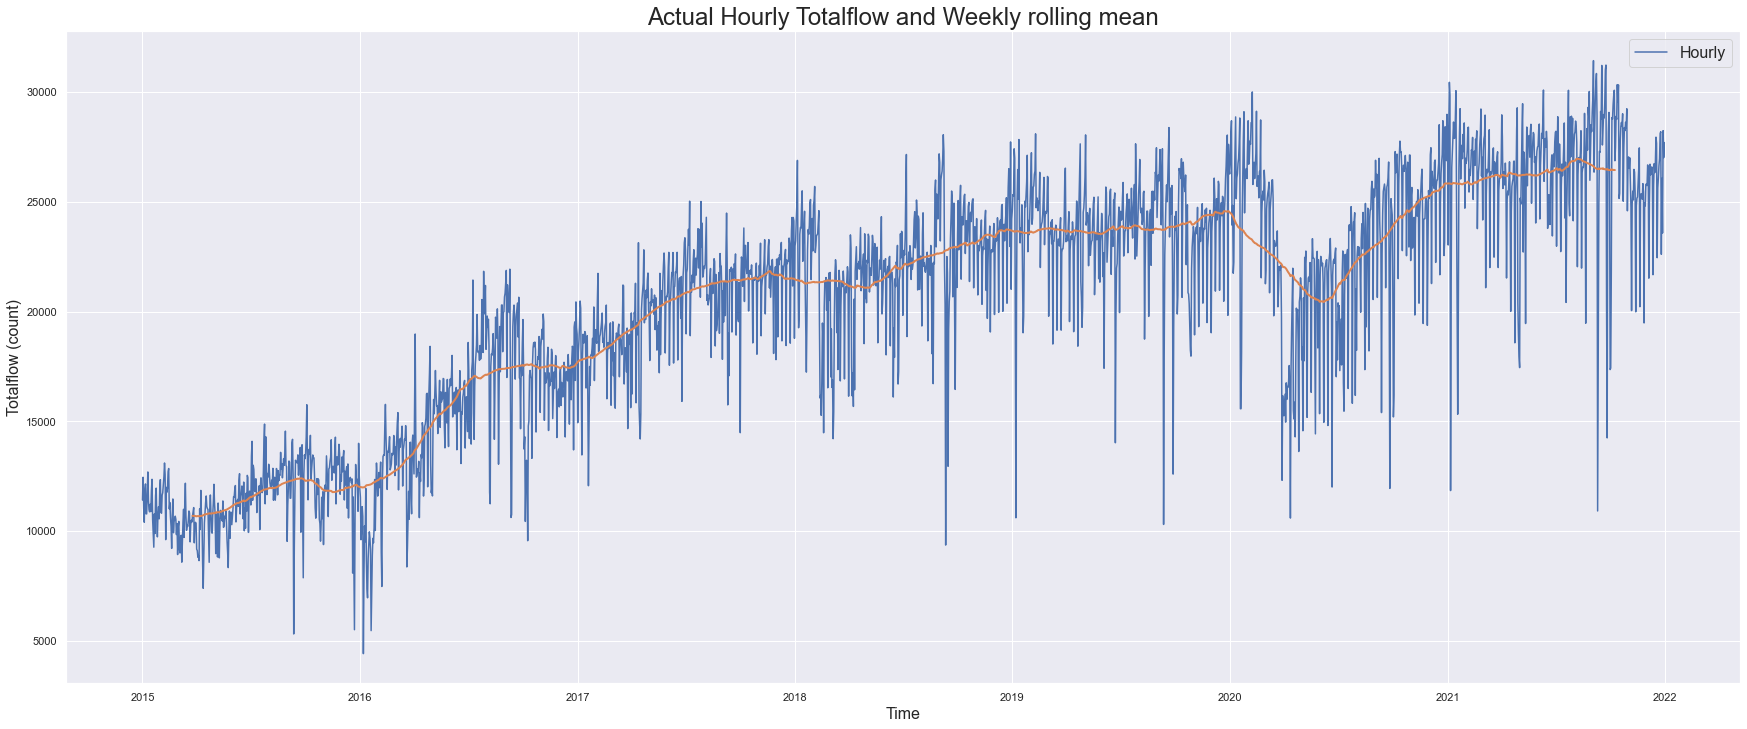

In [209]:
# Plot the hourly actual Totalflow, along with the weekly rolling mean

rolling = df_final['Totalflow'].rolling(24*7, center=True).mean()
ax = plot_series(df_final, 'Totalflow', label='Hourly', ylabel='Totalflow (count)',
                 title='Actual Hourly Totalflow and Weekly rolling mean')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

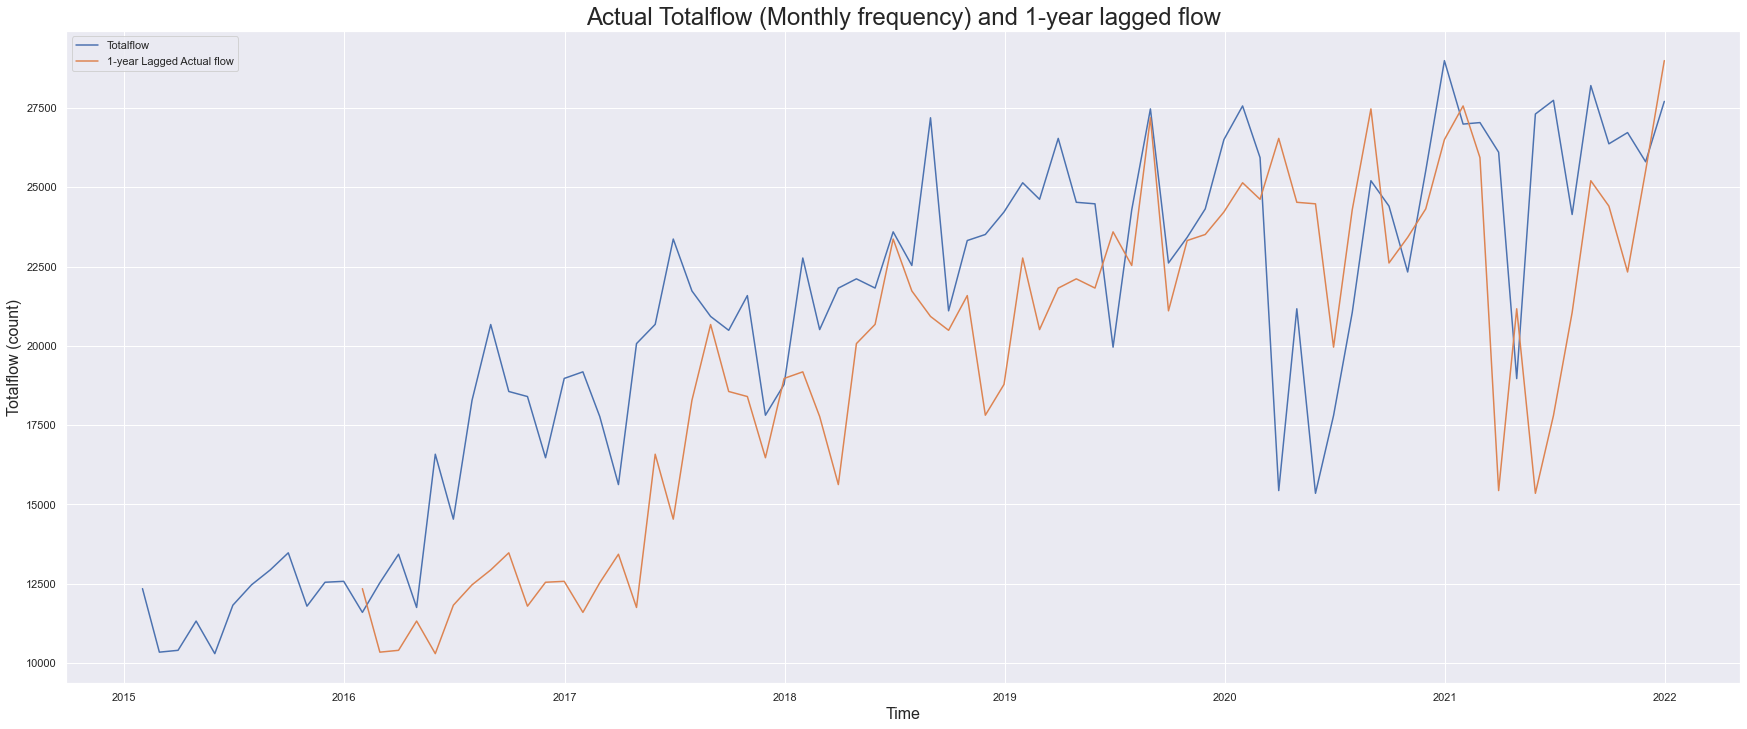

In [210]:
# Plot the Totalflow (monthly frequence) along with its 1-year lagged series

monthly_Totalflow = df_final['Totalflow'].asfreq('M')
ax = plot_series(series=monthly_Totalflow, ylabel='Totalflow (count)',
                 title='Actual Totalflow (Monthly frequency) and 1-year lagged flow')
shifted = df_final['Totalflow'].asfreq('M').shift(12)
ax.plot(shifted, label='Hourly')
ax.legend(['Totalflow', '1-year Lagged Actual flow'])
plt.show()

In [214]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [213]:
mse2 = mean_squared_error(monthly_Totalflow, shifted)
print('Root mean square error', mse2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

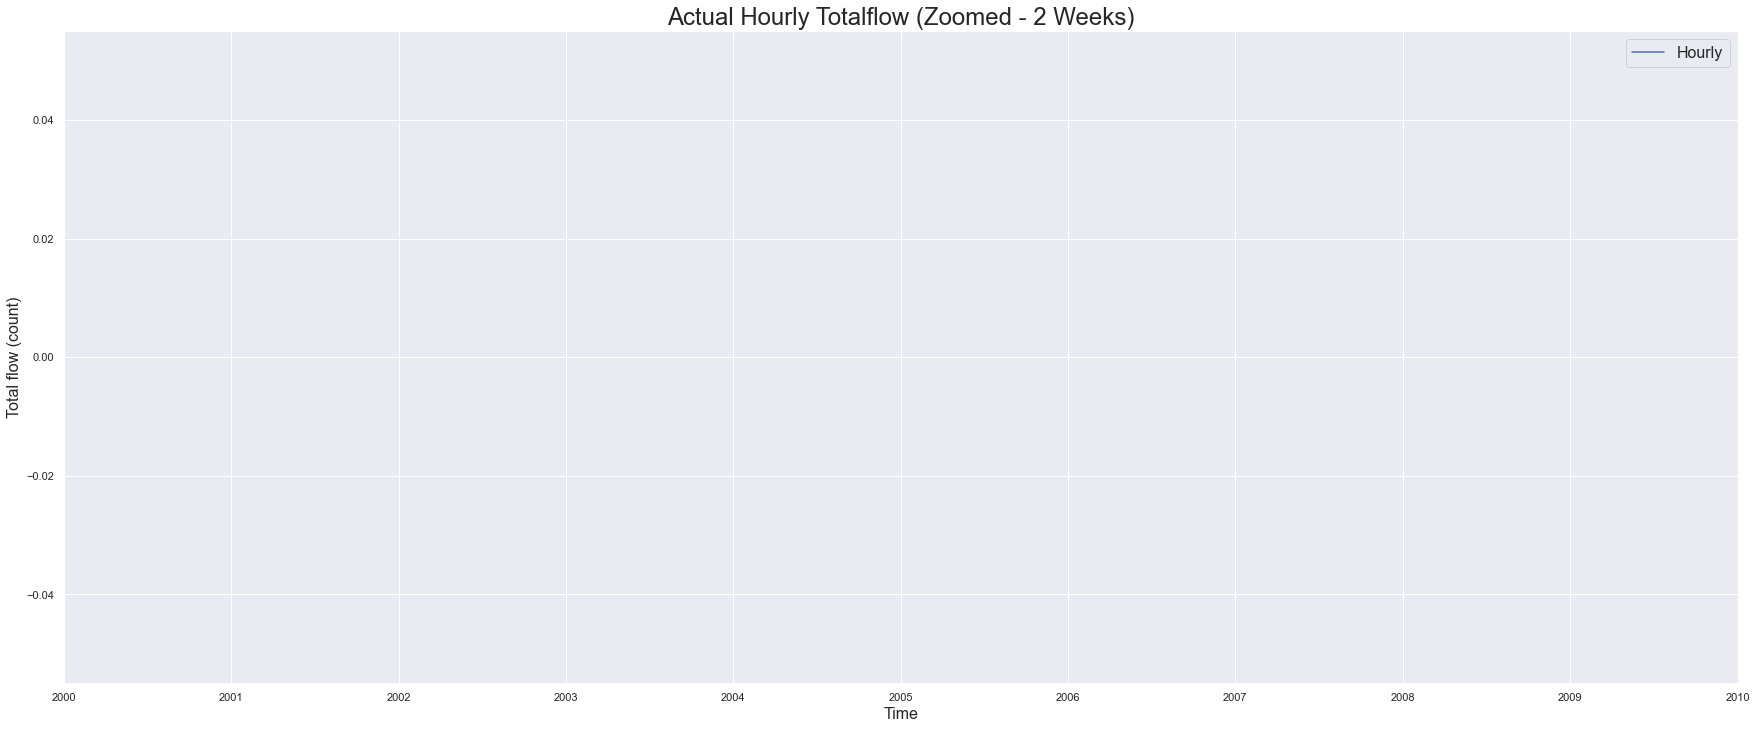

In [215]:
# Plot the actual Totalflow at a daily/weekly scale

ax = plot_series(df_final, 'Totalflow', label='Hourly', ylabel='Total flow (count)',
                 start=1 + 24 * 500, end=1 + 24 * 515,
                 title='Actual Hourly Totalflow (Zoomed - 2 Weeks)')
plt.show()

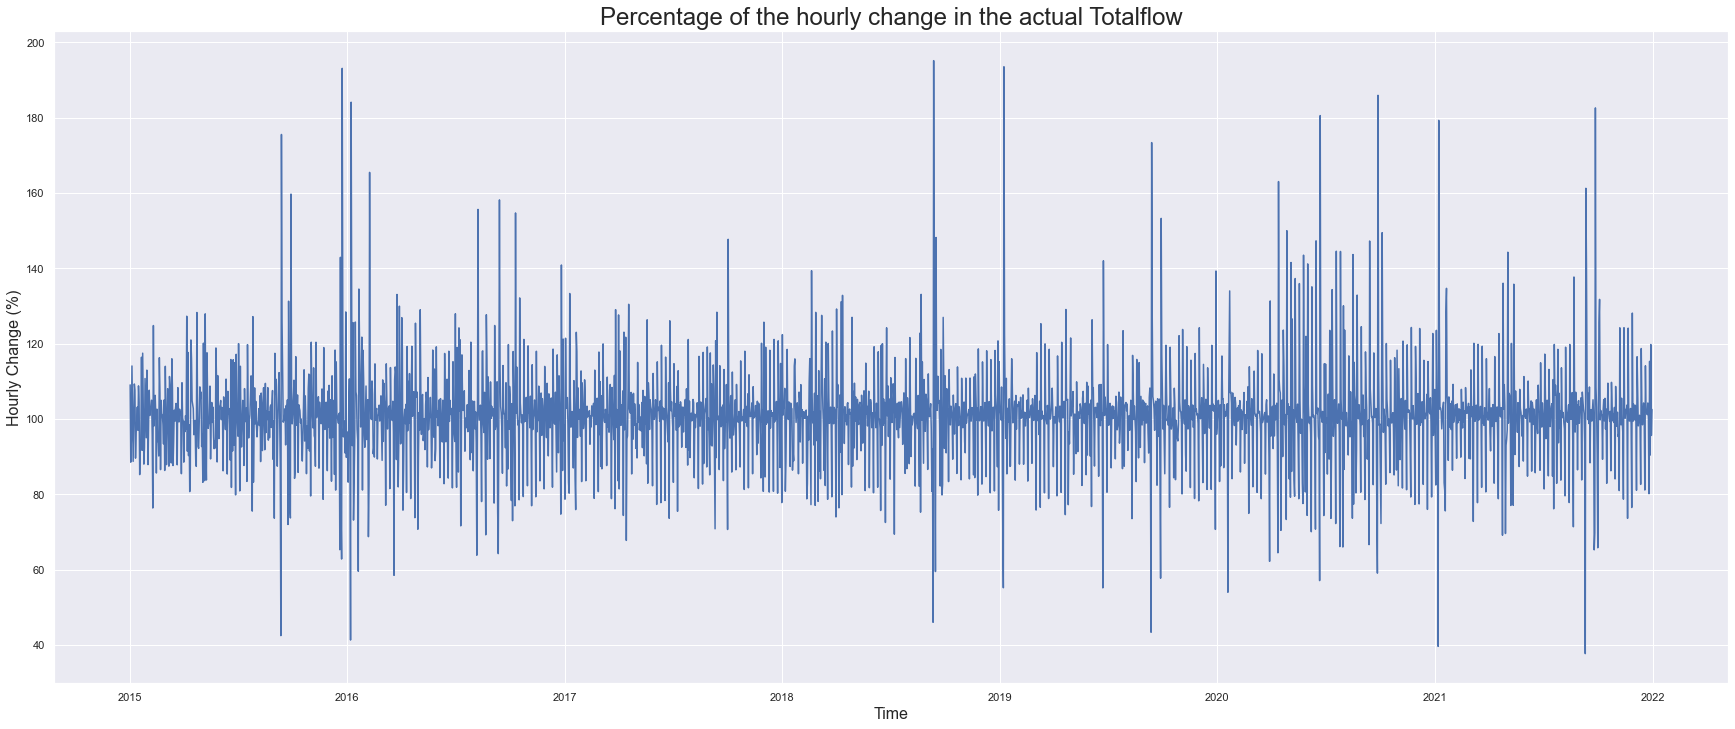

In [216]:
# Plot the percentage of the hourly change in the actual Total flow

change = tollroad['Totalflow'].div(tollroad['Totalflow'].shift(1)).mul(100)
ax = plot_series(series=change, ylabel='Hourly Change (%)', 
                 title='Percentage of the hourly change in the actual Totalflow')
plt.show()

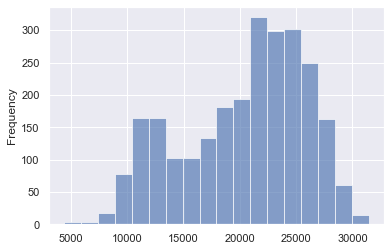

In [217]:
# Plot the histogram of the actual Total traffic flow

ax = tollroad['Totalflow'].plot.hist(bins=18, alpha=0.65)

In [218]:
y = df_final['Totalflow']
adf_test = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

ADF Statistic: -1.827144
p-value: 0.367071
#Lags used: 27
Critical Value (1%): -3.432938
Critical Value (5%): -2.862684
Critical Value (10%): -2.567379


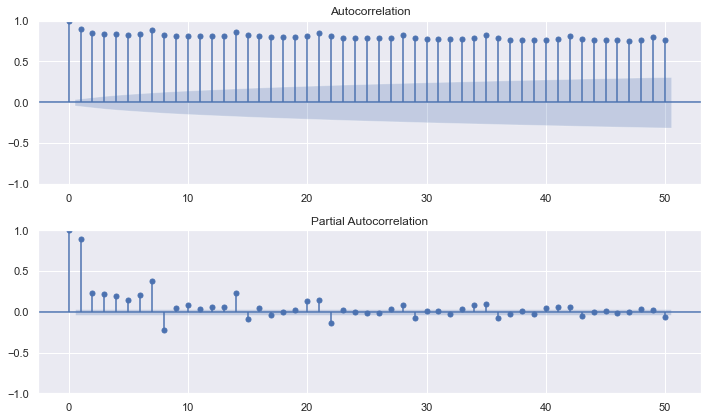

In [219]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plot_acf(df_final['Totalflow'], lags=50, ax=ax1)
plot_pacf(df_final['Totalflow'], lags=50, ax=ax2)
plt.tight_layout()
plt.show()

In [220]:
# Features Enginering

In [221]:
# Find the correlations between the energy price and the rest of the features

correlations = df_final.corr(method='pearson')
print(correlations['Totalflow'].sort_values(ascending=False).to_string())

Totalflow    1.0


In [222]:
# Plot Pearson correlation matrix

#correlations = df_final.corr(method='pearson')
#fig = plt.figure(figsize=(24, 24))
#sns.heatmap(correlations, annot=True, fmt='.2f')
#plt.title('Pearson Correlation Matrix')
#plt.show()

In [223]:
highly_correlated = abs(correlations[correlations > 0.70])
print(highly_correlated[highly_correlated < 1.0].stack().to_string())

Series([], )


In [224]:
# Generate 'hour', 'weekday' and 'month' features

for i in range(len(df_final)):
    position = df_final.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    df_final.loc[position, 'hour'] = hour
    df_final.loc[position, 'weekday'] = weekday
    df_final.loc[position, 'month'] = month
    

In [225]:
considered_features = ['hour', 'weekday', 'month']

In [226]:
len(considered_features)

3

In [227]:
values = df_final[considered_features].values

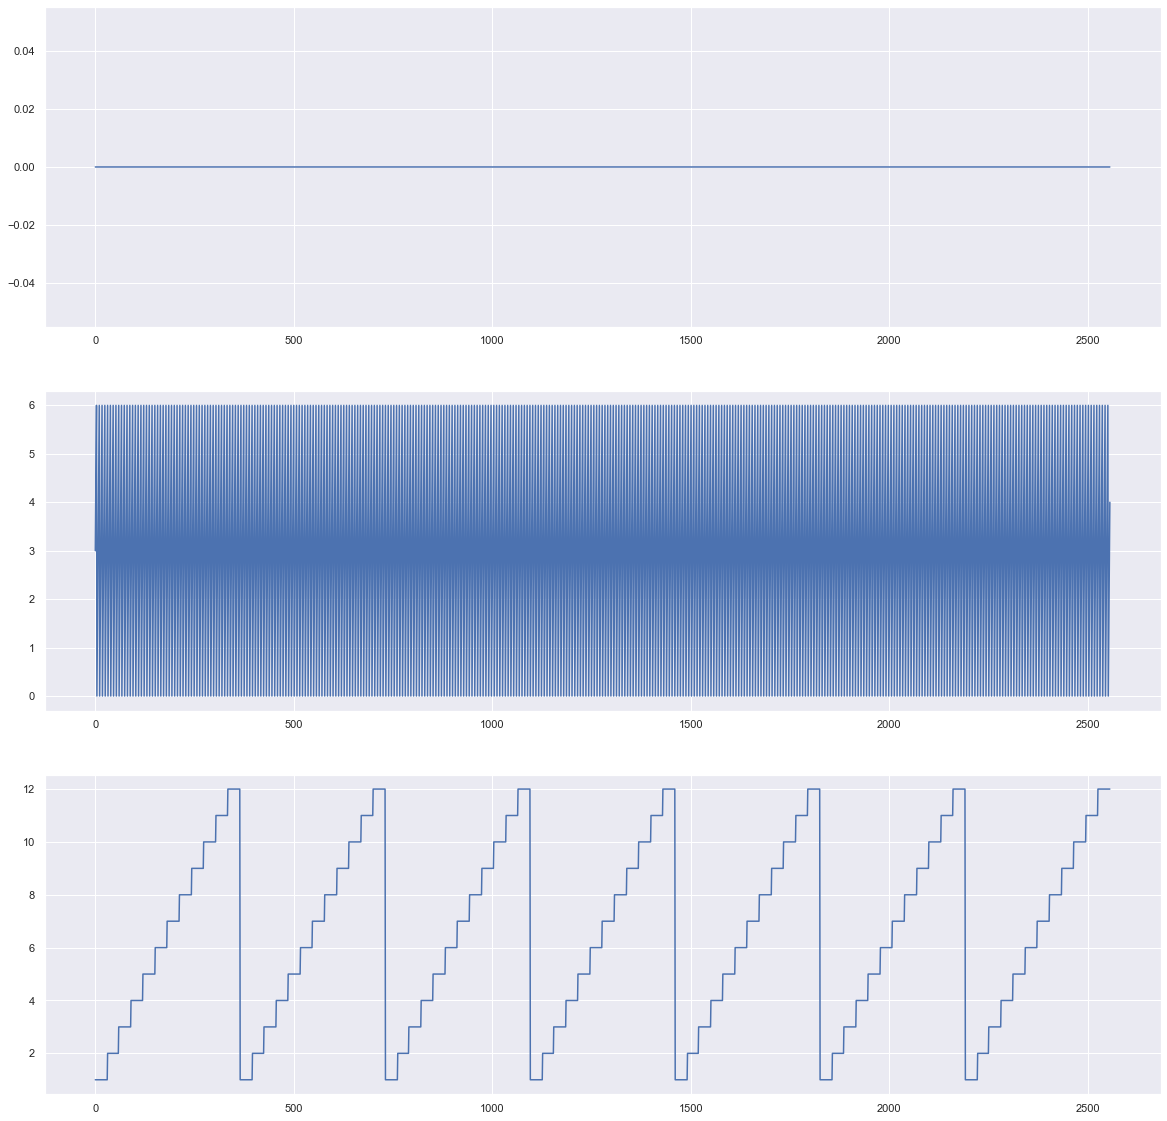

In [228]:
# Plot time-series of considered features

plt.figure(figsize=(20, 20))
for i in range(values.shape[1]):
    plt.subplot(values.shape[1], 1, i+1)
    plt.plot(values[:, i])
plt.show()

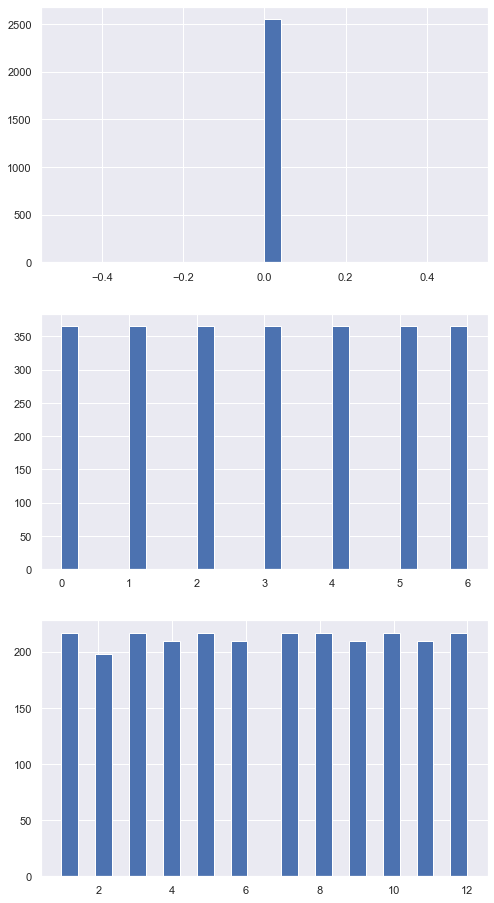

In [229]:
# Plot distributions of considered features

plt.figure(figsize=(8, 16))
for i in range(values.shape[1]):
    plt.subplot(values.shape[1], 1, i+1)
    plt.hist(values[:, i], bins=24)
plt.show()

In [230]:
#Automatic Outlier removal

In [231]:
# Automatic Outlier Removal

for feature in considered_features:
    mean_feat = df_final[feature].mean()
    stdev_feat = df_final[feature].std()
    upper_limit = mean_feat + 4 * stdev_feat
    lower_limit = mean_feat - 4 * stdev_feat
    df_final.loc[df_final[feature] > upper_limit, feature] = np.nan
    df_final.loc[df_final[feature] < lower_limit, feature] = np.nan

In [232]:
# Number of removed values per column

df_final[considered_features].isnull().sum()

hour       0
weekday    0
month      0
dtype: int64

In [233]:
# Fill outlier rows using interpolation

df_final.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [234]:
#investigating forecast

In [235]:
y = df_final['Totalflow'].values
y_forecast = tollroad['Totalflow'].values

In [236]:
# Split data into train, cv and test datasets

y_train = y[:1500]
y_cv = y[2555: 3003]
y_test = y[3000:]

In [237]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i + target_size])
    return np.array(data), np.array(labels)

In [238]:
def plot_model_rmse_and_loss(history):
    
    # Evaluate train and validation accuracies and losses
    
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Visualize epochs vs. train and validation accuracies and losses
    
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')
    
    plt.show()

In [199]:
def plot_learning_rate_schedule(history_lr, max_loss):
    plt.semilogx(history_lr.history['lr'], history_lr.history['loss'])
    plt.axis([1e-4, 1, 0, max_loss])
    plt.xlabel('Learning Rate')
    plt.ylabel('Training Loss')
    plt.show()

In [200]:
train_end_idx = 1500
cv_end_idx = 2000
test_end_idx = 2555

In [201]:
y = df_final['Totalflow'].values

In [202]:
scaler = MinMaxScaler(feature_range=(0, 1))
y_reshaped = y.reshape(-1, 1)
scaler.fit(y_reshaped[:train_end_idx])

MinMaxScaler()

In [203]:
scaled_price = scaler.transform(y_reshaped)

In [204]:
# Set the number of previous time-lags that will be used

#univariate_past_history = 3
#univariate_past_history = 10
univariate_past_history = 2555

In [205]:
univariate_future_target = 0

In [206]:
X_train_univ, y_train_univ = univariate_data(scaled_price, 0, train_end_idx,
                                             univariate_past_history,
                                             univariate_future_target)

In [207]:
X_val_univ, y_val_univ = univariate_data(scaled_price, train_end_idx, cv_end_idx,
                                         univariate_past_history,
                                         univariate_future_target)

In [208]:
X_test_univ, y_test_univ = univariate_data(scaled_price, cv_end_idx, test_end_idx,
                                           univariate_past_history,
                                           univariate_future_target)

In [209]:
batch_size = 64
buffer_size = 1000

In [210]:
train_univ = tf.data.Dataset.from_tensor_slices((X_train_univ, y_train_univ))
train_univ = train_univ.cache().shuffle(buffer_size).batch(batch_size).prefetch(1)

In [211]:
val_univ = tf.data.Dataset.from_tensor_slices((X_val_univ, y_val_univ))
val_univ = val_univ.batch(batch_size).prefetch(1)

In [212]:
# Define some common parameters

input_shape_univ = X_train_univ.shape[-2:]
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In [213]:
y_test_univ_inv = scaler.inverse_transform(y_test_univ)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [179]:
#Univariate LSTM

In [181]:
tf.keras.backend.clear_session()

univariate_lstm = tf.keras.models.Sequential([LSTM(80, input_shape=input_shape_univ, return_sequences=True),
    Flatten(),
    Dense(160, activation='relu'),
    Dropout(0.05),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4, amsgrad=True)
univariate_lstm.compile(loss=loss,
                        optimizer=optimizer,
                        metrics=metric)

ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 0)

In [ ]:
history_lr = univariate_lstm.fit(train_univ, epochs=500,batch_size=64,
                                 validation_data=val_univ,
                                 callbacks=[lr_schedule])

In [117]:
plot_learning_rate_schedule(history_lr, 0.05)

NameError: name 'history_lr' is not defined

In [118]:
tf.keras.backend.clear_session()

univariate_lstm = tf.keras.models.Sequential([
    LSTM(80, input_shape=input_shape_univ, return_sequences=True),
    Flatten(),
    Dense(500, activation='relu'),
    Dropout(0.05),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'univariate_lstm.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=4e-3, amsgrad=True)

univariate_lstm.compile(loss=loss,
                        optimizer=optimizer,
                        metrics=metric)

NameError: name 'Flatten' is not defined

In [119]:
history = univariate_lstm.fit(train_univ, epochs=120,
                              validation_data=val_univ,
                              callbacks=[early_stopping, 
                                         model_checkpoint])

NameError: name 'univariate_lstm' is not defined

In [120]:
plot_model_rmse_and_loss(history)

NameError: name 'history' is not defined

In [121]:
univariate_lstm = tf.keras.models.load_model('univariate_lstm.h5')

forecast = univariate_lstm.predict(X_test_univ)
univariate_lstm_forecast = scaler.inverse_transform(forecast)

rmse_univ_lstm = sqrt(mean_squared_error(y_test_univ_inv,
                                         univariate_lstm_forecast))
print('RMSE of daily totalflow univariate LSTM forecast: {}'
      .format(round(rmse_univ_lstm, 3)))

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
# Univariate Stacked LSTM

In [ ]:
tf.keras.backend.clear_session()

univariate_stacked_lstm = tf.keras.models.Sequential([
    LSTM(250, input_shape=input_shape_univ, 
         return_sequences=True),
    LSTM(150, return_sequences=True),
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.05),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4, amsgrad=True)
univariate_stacked_lstm.compile(loss=loss,
                        optimizer=optimizer,
                        metrics=metric)

In [ ]:
history_lr = univariate_stacked_lstm.fit(train_univ, epochs=50,
                                         validation_data=val_univ,
                                         callbacks=[lr_schedule])

In [ ]:
plot_learning_rate_schedule(history_lr, 0.5)

In [ ]:
tf.keras.backend.clear_session()

univariate_stacked_lstm = tf.keras.models.Sequential([
    LSTM(250, input_shape=input_shape_univ, 
         return_sequences=True),
    LSTM(150, return_sequences=True),
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.05),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'univariate_stacked_lstm.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=2e-3, amsgrad=True)

univariate_stacked_lstm.compile(loss=loss,
                                optimizer=optimizer,
                                metrics=metric)

In [122]:
history = univariate_stacked_lstm.fit(train_univ, epochs=120,
                                      validation_data=val_univ,
                                      callbacks=[early_stopping, 
                                                 model_checkpoint])

NameError: name 'univariate_stacked_lstm' is not defined

In [123]:
plot_model_rmse_and_loss(history)

NameError: name 'history' is not defined

In [124]:
univariate_stacked_lstm = tf.keras.models.load_model('univariate_stacked_lstm.h5')

forecast = univariate_stacked_lstm.predict(X_test_univ)
univariate_stacked_lstm_forecast = scaler.inverse_transform(forecast)

rmse_univ_stacked_lstm = sqrt(mean_squared_error(y_test_univ_inv,
                                                 univariate_stacked_lstm_forecast))
print('RMSE of Totaflow univariate Stacked LSTM forecast: {}'
      .format(round(rmse_univ_stacked_lstm, 3)))

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
#Univariate CNN forecast

In [ ]:
tf.keras.backend.clear_session()

univariate_cnn = tf.keras.models.Sequential([
    Conv1D(filters=50, kernel_size=2,
           strides=1, padding='causal',
           activation='relu', 
           input_shape=input_shape_univ),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4, amsgrad=True)
univariate_cnn.compile(loss=loss,
                       optimizer=optimizer,
                       metrics=metric)

In [ ]:
history_lr = univariate_cnn.fit(train_univ, epochs=50,
                                validation_data=val_univ,
                                callbacks=[lr_schedule])

In [ ]:
plot_learning_rate_schedule(history_lr, 0.05)

In [ ]:
tf.keras.backend.clear_session()

univariate_cnn = tf.keras.models.Sequential([
    Conv1D(filters=50, kernel_size=2,
           strides=1, padding='causal',
           activation='relu', 
           input_shape=input_shape_univ),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'univariate_cnn.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=6e-3, amsgrad=True)

univariate_cnn.compile(loss=loss,
                       optimizer=optimizer,
                       metrics=metric)

In [ ]:
history = univariate_cnn.fit(train_univ, epochs=120,
                             validation_data=val_univ,
                             callbacks=[early_stopping, 
                                        model_checkpoint])

In [ ]:
plot_model_rmse_and_loss(history)

In [ ]:
univariate_cnn = tf.keras.models.load_model('univariate_cnn.h5')

forecast = univariate_cnn.predict(X_test_univ)
univariate_cnn_forecast = scaler.inverse_transform(forecast)

rmse_univ_cnn = sqrt(mean_squared_error(y_test_univ_inv, 
                                        univariate_cnn_forecast))
print('RMSE of Total flow univariate CNN forecast: {}'
      .format(round(rmse_univ_cnn, 3)))

In [125]:
#Univariate CNN-LSTM forecast

In [126]:
tf.keras.backend.clear_session()

univariate_cnn_lstm = tf.keras.models.Sequential([
    Conv1D(filters=100, kernel_size=2,
           strides=1, padding='causal',
           activation='relu', 
           input_shape=input_shape_univ),
    LSTM(100, return_sequences=True),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4, amsgrad=True)
univariate_cnn_lstm.compile(loss=loss,
                            optimizer=optimizer,
                            metrics=metric)

NameError: name 'Conv1D' is not defined

In [127]:
history_lr = univariate_cnn_lstm.fit(train_univ, epochs=50,
                                     validation_data=val_univ,
                                     callbacks=[lr_schedule])

NameError: name 'univariate_cnn_lstm' is not defined

In [128]:
plot_learning_rate_schedule(history_lr, 0.05)

NameError: name 'history_lr' is not defined

In [129]:
tf.keras.backend.clear_session()

univariate_cnn_lstm = tf.keras.models.Sequential([
    Conv1D(filters=100, kernel_size=2,
           strides=1, padding='causal',
           activation='relu', 
           input_shape=input_shape_univ),
    LSTM(100, return_sequences=True),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'univariate_cnn_lstm.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=3e-3, amsgrad=True)

univariate_cnn_lstm.compile(loss=loss,
                            optimizer=optimizer,
                            metrics=metric)

NameError: name 'Conv1D' is not defined

In [130]:
history = univariate_cnn_lstm.fit(train_univ, epochs=120,
                                  validation_data=val_univ,
                                  callbacks=[early_stopping, 
                                             model_checkpoint])

NameError: name 'univariate_cnn_lstm' is not defined

In [131]:
plot_model_rmse_and_loss(history)

NameError: name 'history' is not defined

In [132]:
univariate_cnn_lstm = tf.keras.models.load_model('univariate_cnn_lstm.h5')

forecast = univariate_cnn_lstm.predict(X_test_univ)
univariate_cnn_lstm_forecast = scaler.inverse_transform(forecast)

rmse_univ_cnn_lstm = sqrt(mean_squared_error(y_test_univ_inv, 
                                             univariate_cnn_lstm_forecast))
print('RMSE of Totalflow univariate CNN-LSTM forecast: {}'
      .format(round(rmse_univ_cnn_lstm, 3)))

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
#Univariate MLP forecast

In [ ]:
tf.keras.backend.clear_session()

univariate_mlp = tf.keras.models.Sequential([
    TimeDistributed(Dense(250, activation='relu'),
                    input_shape=input_shape_univ),
    TimeDistributed(Dense(200, activation='relu')),
    TimeDistributed(Dense(150, activation='relu')),
    TimeDistributed(Dense(100, activation='relu')),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4, amsgrad=True)
univariate_mlp.compile(loss=loss,
                       optimizer=optimizer,
                       metrics=metric)

In [ ]:
history_lr = univariate_mlp.fit(train_univ, epochs=50,
                                validation_data=val_univ,
                                callbacks=[lr_schedule])

In [ ]:
plot_learning_rate_schedule(history_lr, 0.05)

In [133]:
tf.keras.backend.clear_session()

univariate_mlp = tf.keras.models.Sequential([
    TimeDistributed(Dense(250, activation='relu'),
                    input_shape=input_shape_univ),
    TimeDistributed(Dense(200, activation='relu')),
    TimeDistributed(Dense(150, activation='relu')),
    TimeDistributed(Dense(100, activation='relu')),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'univariate_mlp.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=3e-3, amsgrad=True)

univariate_mlp.compile(loss=loss,
                       optimizer=optimizer,
                       metrics=metric)

NameError: name 'TimeDistributed' is not defined

In [134]:
history = univariate_mlp.fit(train_univ, epochs=120,
                             validation_data=val_univ,
                             callbacks=[early_stopping, 
                                        model_checkpoint])

NameError: name 'univariate_mlp' is not defined

In [135]:
plot_model_rmse_and_loss(history)

NameError: name 'history' is not defined

In [136]:
history

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error,r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)
#ETRE=pd.read_csv('H:/My research/python jupyter/LSTM/trafficbydate.csv')
ETRE=pd.read_csv('H:/My research/python jupyter/ARIMA/etretrafficbydate.csv')
tollroad = pd.DataFrame(data=ETRE,columns=['Totalflow'])
tollroad.ffill(inplace=True)
tollroad["Totalflow"] = tollroad["Totalflow"].astype(float).astype(int)
print(tollroad)
#plot the data loaded to visualize trends
#daily
plt.figure(figsize=(20,5)).suptitle("daily",fontsize=20)
plt.plot(tollroad["Totalflow"].head(24))
plt.show()
#weakly
plt.figure(figsize=(20,5)).suptitle("Weekly",fontsize=20)
plt.plot(tollroad["Totalflow"].head(168))
plt.show()
#monthly
plt.fi

In [137]:
univariate_mlp = tf.keras.models.load_model('univariate_mlp.h5')

forecast = univariate_mlp.predict(X_test_univ)
univariate_mlp_forecast = scaler.inverse_transform(forecast)

rmse_univ_mlp = sqrt(mean_squared_error(y_test_univ_inv, 
                                        univariate_mlp_forecast))
print('RMSE of Totaflow univariate MLP forecast: {}'
      .format(round(rmse_univ_mlp, 3)))

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
# LSTM for toll road totalflow problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('H:/My research/python jupyter/ARIMA/etretrafficbydate.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=10, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [138]:
#new Test

In [139]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from tensorflow.python.keras.metrics import Metric
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
import numpy as np
import pandas as pd
#import tensorflow as tf
#import keras

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(palette="Set2")

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
pd.options.display.max_rows = None
pd.options.display.max_columns = None
#importing libraries
#commercial bank of ethiopia customer churn prediction and analysis using machine learning and deep learning 
#credited to Temesgen 

import numpy as np
import pandas as pd
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(palette="Set2")

from sklearn.model_selection import train_test_split


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

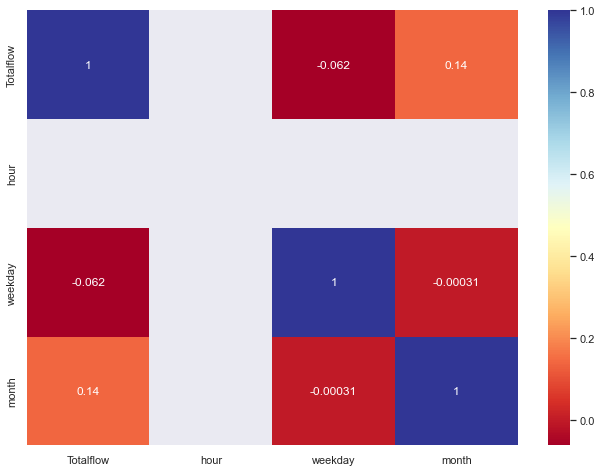

In [140]:
#Checking Correlation
plt.subplots(figsize=(11,8))
sns.heatmap(tollroad.corr(), annot=True, cmap="RdYlBu")
plt.show()

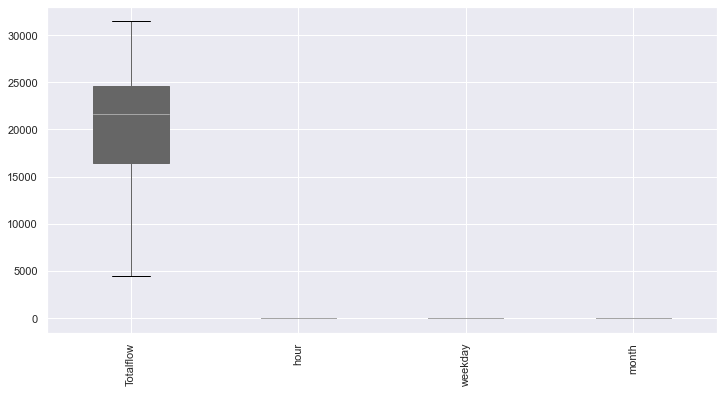

In [141]:
#Detecting Outliers using Tukey Boxplot
plt.figure(figsize=(12,6))
bplot = tollroad.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

In [142]:
X = tollroad.iloc[:, :-1].values
Y = tollroad.iloc[:, -1].values

In [ ]:
X

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import time
from numpy import newaxis
import math
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
#loading data
df = pd.read_csv('H:/My research/python jupyter/ARIMA/etretrafficbydate.csv')
df["Date"]=pd.to_datetime(df['Date'])

In [ ]:
#split train and test
train_size = round(0.75*len(df))
train = df[1:train_size]
test = df[train_size:]

In [ ]:

#http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std() 

    #Plot rolling statistics:
    #fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df.Totalflow)

In [ ]:
# Method 1 - Baseline using last day value
prediction = test.copy().drop(['Totalflow'], axis=1)
prediction['last_day'] = train['Totalflow'][len(train)-1]

x = 30
prediction['last_x_day'] = train['Totalflow'].rolling(x).mean().iloc[-1]

plt.plot(train.index, train['Totalflow'], label='Train')
plt.plot(test.index,test['Totalflow'], label='Test')
plt.plot(prediction.index,prediction['last_day'], label='Last Day')
plt.plot(prediction.index,prediction['last_x_day'], label='Last %d Days'%x)
plt.legend(loc='best')
plt.show()

print("#Last Day\nCoefficent:" ,round(np.corrcoef(test.Totalflow,prediction.last_day)[0,1],4),\
      " RMSE:", round(math.sqrt(mean_squared_error(test.Totalflow, prediction.last_day)),4),\
      " MAPE:", round(mean_absolute_percentage_error(test.Totalflow, prediction.last_day),4)) 

print("#Last %d Days\nCoefficent:"%x ,round(np.corrcoef(test.Totalflow,prediction.last_x_day)[0,1],4),\
      " RMSE:", round(math.sqrt(mean_squared_error(test.Totalflow, prediction.last_x_day)),4),\
      " MAPE:", round(mean_absolute_percentage_error(test.Totalflow, prediction.last_x_day),4)) 
      

In [ ]:
# Method 2 - capture Seasonality using Holt, ARIMA
# analysing training data
sm.tsa.seasonal_decompose(train.Totalflow).plot()
plt.show()

In [ ]:
from datetime import date, timedelta
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM
from keras import callbacks
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

#loading the data
data = pd.read_csv("H:/My research/python jupyter/ARIMA/etretrafficbydate.csv",parse_dates=["Date"])
scaler = MinMaxScaler(feature_range=(0, 1))
data['Totalflow'] = scaler.fit_transform(data['Totalflow'].values.reshape(-1,1))
data = data.set_index(pd.DatetimeIndex(data['Date'],freq = 'D')).drop(['Date'], axis=1)



def get_timespan(input_data, date, minus, periods, freq='D'):
    return input_data.loc[pd.date_range(date - timedelta(days=minus), periods=periods, freq=freq)]

train_start_date = pd.datetime(2017, 6, 10)

def convert_timeseries(data, start_date, is_train=True):
    X = pd.DataFrame({"last_1": get_timespan(data, start_date, 1, 1).values.ravel(),
                  "last_3_mean": get_timespan(data, start_date, 3, 3).mean().values,#last 3
                  "last_5_mean": get_timespan(data, start_date, 5, 5).mean().values,#last 5
                  "last_7_mean": get_timespan(data, start_date, 7, 7).mean().values,#last 5
                  "last_14_mean": get_timespan(data, start_date, 14, 14).mean().values})
    for i in range(7):
        X['last_4_dow{}_mean'.format(i)] = get_timespan(data, start_date, 28-i, 4, freq='7D').mean().values #get every week last 7
    if is_train:
        y = data.loc[pd.date_range(start_date, periods=1)].values
        return X, y
    return X
    
#choose cut off for train and test
cut_off = pd.datetime(2018, 2, 1)

#set up training data
X_train, y_train = [], []
for i in range(pd.Timedelta(cut_off - train_start_date).days):
    delta = timedelta(days=i)
    X_tmp, y_tmp = convert_timeseries(data, train_start_date + delta)
    X_train.append(X_tmp)
    y_train.append(y_tmp)
    
X_train = pd.concat(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

#X_train = X_train.as_matrix()
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))


X_test, y_test = [], []
for i in range(pd.Timedelta(data.index[-2] - cut_off).days):
    delta = timedelta(days=i)
    X_tmp, y_tmp = convert_timeseries(data, cut_off + delta)
    X_test.append(X_tmp)
    y_test.append(y_tmp)
    
X_test = pd.concat(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

#X_test = X_test.as_matrix()
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

#model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(.1))
model.add(Dense(8))
model.add(Dropout(.1))
model.add(Dense(1))
#model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])
model.compile(loss='mse',optimizer=optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True))

from numpy import newaxis
def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[i:i+1]))
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted
    
    
    model.fit(X_train, y_train, batch_size = 512, epochs = 500, verbose=2)
#plt.plot(model.predict(X_test))
plt.plot(np.concatenate(predict_sequence_full(model, X_test, window_size = 1)).ravel())
plt.plot(y_test)
plt.show()

def get_timespan(input_data, date, minus, periods, freq='D'):
    return input_data.loc[pd.date_range(date - timedelta(days=minus), periods=periods, freq=freq)]

def convert_timeseries(input_data, start_date, is_train=True):
    X = pd.DataFrame({"last_1": get_timespan(input_data, start_date, 1, 1).mean().values,
                  "last_2_mean": get_timespan(input_data, start_date, 2, 2).mean().values,#last 2
                  "last_3_mean": get_timespan(input_data, start_date, 3, 3).mean().values,#last 3
                  "last_4_mean": get_timespan(input_data, start_date, 4, 4).mean().values,#last 4 
                  "last_5_mean": get_timespan(input_data, start_date, 5, 5).mean().values,#last 5
                  "last_6_mean": get_timespan(input_data, start_date, 6, 6).mean().values,#last 6
                  "last_7_mean": get_timespan(input_data, start_date, 7, 7).mean().values,#last 7
                  "last_14_mean": get_timespan(input_data, start_date, 14, 14).mean().values})
    for i in range(7):
        X['last_4_dow{}_mean'.format(i)] = get_timespan(input_data, start_date, 28-i, 4, freq='7D').mean().values #get every week last 7
    if is_train:
        y = input_data.loc[pd.date_range(start_date, periods=1)].mean().values
        return X, y
    return X

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[i:i+1]))
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted
    
    
  #set up training data
X_train, y_train = [], []
for i in range(pd.Timedelta(cut_off - train_start_date).days):
    delta = timedelta(days=i)
    X_tmp, y_tmp = convert_timeseries(df, train_start_date + delta)
    X_train.append(X_tmp)
    y_train.append(y_tmp)
    
X_train = pd.concat(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

#X_train = X_train.as_matrix()
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

#set up testing data
X_test, y_test = [], []
for i in range(pd.Timedelta(df.index[-1] - cut_off).days):
    delta = timedelta(days=i)
    X_tmp, y_tmp = convert_timeseries(df, cut_off + delta)
    X_test.append(X_tmp)
    y_test.append(y_tmp)
    
X_test = pd.concat(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

#X_test = X_test.as_matrix()
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1])) 


#model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(.1))
model.add(Dense(8))
model.add(Dropout(.1))
model.add(Dense(1))
model.compile(loss='mse',optimizer=optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True))#optimizer='adam', metrics=['mse']
model.fit(X_train, y_train, batch_size = 512, epochs = 1000, verbose=2)


prediction['lstm'] = np.concatenate(predict_sequence_full(model, X_test, window_size = 1)).ravel()
plt.figure(figsize=(12,4))
plt.plot(train['Totalflow'], label='Train')
plt.plot(test['Totalflow'], label='Test')
plt.plot(prediction['lstm'], label='LSTM')
plt.legend(loc='best')
plt.show()

print("#LSTM\nCoefficent:",round(np.corrcoef(test.Totalflow,prediction.lstm)[0,1],4),\
      " RMSE:", round(math.sqrt(mean_squared_error(test.Totalflow, prediction.lstm)),4),\
      " MAPE:", round(mean_absolute_percentage_error(test.Totalflow, prediction.lstm),4)) 